# Prueba Fundamentos de Data Science - Desafío 2

### Alumno: Jonathan Varas Muñoz

### Profresores: Alfonso Tobar, Sebastián Ulloa

### Generación: G47

---

# Preliminares y Aspectos computacionales

## **1- Descripción del problema**

Nos contactaron desde una Escuela Portuguesa para generar un modelo que identifique los alumnos que tienen un mal desempeño académico, medido en el promedio final del año escolar. Para esto nos envían un dataset con registros sociodemográficos y conductuales de los alumnos de dos escuelas.

A su vez la psicopedagoga nos sugiere revisar una batería de preguntas asociadas a los aspectos ambientales del alumno(desde la columna famrel a health) y ver si podemos abstraer cargas latentes.

Para armar el modelo, nos entregan un dataset llamado 'students.csv', la cuál está en formato de valores separados por coma, pero no viene con el separador común, si no como separado "|" por lo que tendremos que tenerlo en cuenta al momento de la ingesta de datos. Los atributos disponibles en esta Base de Datos son:

* school: Escuela del estudiante. (Binaria: GP[Gabriel Pereira] MS[Mousinho de Silveira])

* sex: Sexo del estudiante. (Binaria: F[Mujer] M[Hombre])

* age: Edad del estudiante. (Numérica)

* address: Ubicación de la casa del estudiante. (Binaria: U[Urbana] R[Rural])

* famsize: Tamaño de la familia (Binaria: LE3[Menor o igual a3] GT3[Más grande que 3])

* Pstatus: Estado cohabitacional de los padres. (Binaria: T[Viviendo juntos] A[Viviendo separados])

* Medu: Nivel educacional de la madre. (Numérica)

* Fedu: Nivel educacional del padre. (Númerica)

* Mjob: Ocupación de la madre (Nominal: 'Teacher'[Profesora] 'Health'[Relacionada a salud] 'Services'[Administración pública o policía]) 'At_home[Casa u otra]

* job: Ocupación del padre (Nominal: 'Teacher'[Profesor] 'Health'[Relacionado a salud] 'Services'[Administración pública o policía]) 'At_home[Casa u otra]

* reason: Razón para escoger la escuela (Nominal: 'home'[Cercano a casa] 'reputation'[Reputación de la escuela] 'course'[Preferencia de cursos] 'other'[Otra])

* guardian: Aporerado del estudiante. (Nominal: 'mother'[Madre] 'father'[Padre] other[Otro])

* traveltime: Tiempo de viaje entre el hogar. **Nos señalan que debemos recodificarla pero ya se encuentra realizada dentro del dataset**

* studytime: Horas semanales dedicadas al estudio. **Nos señalan que debemos recodificarla pero ya se encuentra realizada dentro del dataset**

* failures: Número de clases reprobadas.

* schoolsup: Apoyo educacional del colegio. (Binaria: si - no)

* famsup: Apoyo educacional familiar. (Binaria: si - no)

* paid: Clases particulares pagadas. (Binaria: si - no)

* activities: Actividades extracurriculares. (Binaria: si - no)

* nursery: Asistió a guardería infantil. (Binaria: si - no)

* higher: Desea proseguir estudios superiores. (Binaria: si - no)

* romantic: Relación romántica. (Binaria: si - no)

* famrel: Calidad de las relaciones familiares. (Numérica)

* freetime: Tiempo libre fuera del colegio. (Numérica)

* goout: Salidas con amigos. (Numérica)

* Dalc: Consumo de alcohol en día de semana. (Numérica)

* Walc: Consumo de alcohol en fines de semanas. (Numérica)

* health: Estado de salud actual. (Numérica)

* absences: Cantidad de ausencias escolares. (Numérica)

* G1: Notas del primer semestre. (Numérica)

* G2: Notas del segundo semestre. (Numérica)

* G3: Promedio final. (Numérica)

En este caso, tendremos 3 variables objetivos, las cuales serán G1, G2 y G3. Pero en este caso en particular, al momento de realizar cualquier modelo con alguna de las 3 variables, se excluirán las otras dos, por ejemplo: Si modelamos para G1, excluimos G2 y G3, si modelamos para G2, excluimos G1 y G3, lo mismo si modelamos en G3.

Para G1 y G2 solo generaremos modelos descriptivos y para G3 se realizará tanto modelo descriptivo como predictivo.

El modelo será desarrollado mediante un **Modelo de Regresión Lineal** esto porque las variables objetivos son continuas y no discretas. Siendo este el caso, para la modelación descriptiva utilizaremos el método de los mínimos cuadrados(OLS) y para el modelo predictivo LinealRegression().

### **1.1- Métricas y métodos de depuración**

Dividiremos las Métricas en dos tipos: Descriptivas y predictivas. Esto para diferenciar que métricas usaremos para medir el desempeño de cada modelamiento. Por lo que quedaría de la siguiente forma:

**Métricas del modelo descriptivo y depuración**:

Para el modelamiento descriptivo, nos fijaremos en los siguientes datos que nos entrega el sumario del modelo:

* R2 Ajustado: Consideraremos un mejor desempeño si el R2 cuadrado se acerca al 1.

* AIC, BIC: Consideraremos un mejor desempeño si el AIC y BIC es menor que los otros modelos descriptivos.

* Cond. No: Consideraremos un buen modelo si no presenta Multicolinealidad.

**Depuración del modelo descriptivo**:

Depuraremos mediante una función que nos ayude a eliminar variables por el VIF, esto para evitar multicolinealidad y además haremos depuraciones por p-value, eliminando variables que no sean significativas al 95% de confianza, ósea que si tienen un pvalue mayor a 0.05, serán eliminadas.

**Métricas del modelo predictivo**:

Para comparar entre modelos predictivos, realizaremos validaciones cruzadas con LeaveOneOut() esto porque la data no es tan robusta y nos permite utilizar este método. En cuanto a medición, compararemos mediante la siguiente métrica:

* RMSE: Error cuadrático medio. Nos dirá en cuanto se está equivocando el modelo aproximadamente, por lo que mientras más bajo el RMSE, mejor será el modelo.

## **2- Aspectos Computacionales**

A continuación, presentamos las librerías que utilizaremos para:
 
#### **Ingesta de datos**

In [1]:
import pandas as pd # Libería orientada al uso de DataFrames, el cual nos permite ingestar data, manipular data, exportar data ... etc.

#### **Preprocesamiento**

In [2]:
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder # Libreria utilizada para transformar variables categoricas en números. OneHot: Columnas, Ordinal: Números con orden de importancia.
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer # Librería para procesar datos nulos, imputamos por moda con Categorical y por media con MeanMedian
from feature_engine.wrappers import SklearnTransformerWrapper # Librería que transformar array numpy en DataFrame
from sklearn.preprocessing import StandardScaler # Librería que nos permite estandarizar variables númericas, esto nos ayuda a mejorar la Multicolinealidad y el desempeño de nuestro modelo

#### **Visualización**

In [3]:
import matplotlib.pyplot as plt # Librería que nos ayudará a visualizar las variables tanto continuas como categoricas y además dispersión entre dos variables.
import seaborn as sns # Librería que nos ayudará a visualizar variables. La cual está construida a partir de matplotlib.
import missingno as msngo # Librería para inspeccionar valores perdidos.

#### **Modelación**

In [4]:
from sklearn.linear_model import LinearRegression # Librería que nos permite armar nuestro modelo predictivo con Regresión Líneal
import statsmodels.api as sm # Librería que nos permite armar y exponer nuestro modelo descriptivo desde la Econometría.

#### **Evaluación**

In [5]:
from sklearn.model_selection import cross_val_score, LeaveOneOut # Librería para medir mediante validación cruzada con KFolds.

**Factor Analyzer**

In [6]:
import factor_analyzer as fact # Librería que nos permite buscar cargas latentes
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

### **2.1- Detalles del proceso de recodificación e ingeniería de atributos**

En esta sección veremos como se tratarán las variables que contengan valores perdidos y la recodificación de las variables binarias. Además, veremos la solución de como trataremos
nuestras variables al momento de realizar los modelos descriptivos y predictivos. También, que método utilizaremos para verificar si existen cargas latentes con la batería de preguntas que nos señala la psicopedagoga.

El preprocesamiento lo iremos realizando según vamos avanzando, ya que para facilitar la visualización de nuestras variables, las preferiremos en categorías en vez de numéricas, dicho esto, el preprocesamiento de las variables numéricas como Strings y el trato de valores perdidos lo realizaremos antes de la visualización y posteriormente, al llegar al modelamiento descriptivo y predictivo, realizaremos el preprocessing, imputando variables categóricas y continuas, según el método que corresponda (CategoricalImputer o MeanMedianImputer).

#### **2.1.1- Trato de valores perdidos**

Nos avisan previamente que los valores perdidos se encuentran establecidos en strings "nulidade", "sem validade" y "zero". Al estar de esa forma, no podemos tratar los datos perdidos como NaN y esto genera un problema, ya que no nos permite utilizar librerías de imputación o métodos de Pandas para el trato de estos. Por lo tanto, utilizaremos una función que recorra todas las columnas y que trabaje
a nivel vectorial, reemplazando los valores "nulidade", "sem validade" y "zero" por valores NaN de numpy.

#### **2.1.2- Binarización**

Todas las variables binarias que se encuentren dentro del Dataset, serán recodificadas con un 0 a la case mayoritaría y con 1 a la clase minoritaría, esto mediante una función que reconozca cual categoría es mayor y según el resultado que asigne 1 a la que tenga minoría de clases.

#### **2.1.3- Solución Variables numéricas registradas como Strings**

Las variables numéricas registradas como Strings, serán tratadas con una función importada desde el archivo de utilidades llamada "number_in_marks_to_number". Lo que realiza esta función es quitar mediante un replace las doble comillas y a su vez, transforma el vector en tipo float64.

#### **2.1.4- Columnas object a float64**

Inspeccionando la data, nos damos cuenta que las variables que nos señalan como numéricas se encuentran en formato Object, por lo que serán transformadas a tipo de dato float64 al momento de la visualización de las variables.

#### **2.1.5- Preprocesamiento en la modelación descriptiva y predictiva**

Para los valores perdidos, utilizaremos librerías y métodos de imputación, en el cuál, las variables categóricas las imputaremos por moda con el método CategoricalImputer y para las variables continuas
imputaremos con el método MeanMedianImputer.

Luego de realizar la imputación, las variables categóricas las pasaremos a numéricas con los métodos OneHotEncoder y OrdinalEncoder. Si la data indica que hay un orden en la categoria, utilizamos
OrdinalEncoder, si no, utilizamos OneHotEncoder. Los métodos abarcarian las siguientes columnas:

Finalmente, una vez que pasamos nuestras variables categóricas a numéricas, procederemos a escalar las variables con StandarScaler(), para así, ir evaluando si esto mejora nuestro modelo
descriptivo y predictivo.


#### **2.1.6- Funciones generadas y su objetivo**

In [7]:
import utility_funcs as ut

print(ut.info_utilidades_desafio2.__doc__)


    replace_nullstring
    Función que reemplaza valores Strings por Nulos de Numpy.

    replace_nullstring_list    
    Función que reemplaza valores Strings por Nulos de Numpy ingresando una lista de valores Strings.

    obs_perdidas
    Función que retorna la cantidad de datos perdidos de un vector. Se puede imprimir la lista al ingresar True como parámetro en print_list

    change_nomenclature    
    Función que reemplaza la nomenclatura de datos dentro de un Vector Serie Pandas a través de un diccionario ingresado.

    countplot_sns
    Función que crea un gráfico countplot de seaborn.

    histplot_sns
    Función que crea un gráfico histplot de seaborn.

    histplot_log
    Función que crea un gráfico histplot de seaborn, pero aplicando logaritmo.

    number_in_marks_to_number
    Función que quita doble comillas a datos dentro de un Vector Serie Pandas.

    categorical_to_number
    Función que transforma categorías en números, dejando la mayoritaria en el valor más al

#### **2.2- Buscando cargas latentes**

La psicopedagoga nos ha recomendado buscar cargas latentes en una batería de preguntas que van desde la columna "famrel" hasta "health". Para verificar la existencia de alguna, utilizaremos un Factor Analyzer, donde mediante kmo_all y kmo_model buscaremos si es factible realizar el método. El corte de criterio para continuar con el Factor Analizer es que kmo_model debe ser mayor o igual a 0.60, en caso de que las columnas no presenten esta condición, iremos eliminando variables que presenten un kmo bajo en los datos entregados desde kmo_all, hasta encontrar un kmo_model adecuado, en caso de no ser así, no continuaremos con Factor Analyzer y daremos con que no existen cargas latentes en la batería de preguntas.

In [8]:
import utility_funcs as ut

---

#### **2.2.1 Preprocesamiento**

Primero, para realizar la búsqueda de cargas latentes, debemos normalizar nuestros datos, ya que dos columnas que deberían ser numéricas, se encuentran como Strings

In [9]:
df = pd.read_csv('students.csv', sep='|')

df = df.drop(columns='Unnamed: 0')

#### **2.2.2 Tratando datos perdidos**

Para tratar los datos perdidos en el dataset que se encuentran como "nulidade", "sem validade" y "zero" utilizaremos un for que recorre todas las columnas y va aplicando la función "replace_nullstring_list" la cual toma por parámetros la data, el vector y la lista de nulos que nos señalan

In [10]:
lista_nulos = ['nulidade','sem validade','zero'] # Lista de nulos que se encuentran dentro del Dataset

for column in df: # For que aplica la función alimentada con la lista anterior.
 df[column] = ut.replace_nullstring_list(df, column, lista_nulos)

**Comprobamos en dos columnas**

In [11]:
print(df[df.age == 'nulidade']['age'])
print(df[df.age == 'sem validade']['health'])

Series([], Name: age, dtype: object)
Series([], Name: health, dtype: object)


Como vemos, ninguna columna contiene datos nulidade, sem validade o zero

#### **2.2.2 Tratando variables numéricas que se encuentran como Strings**

Utilizamos la función number_in_marks_to_number para que las 3 variables con valores numéricos como Strings, les quite las doble comillas, para que así, posteriormente pasarlas a números

In [12]:
df['age'] = ut.number_in_marks_to_number(df, 'age')

df['goout'] = ut.number_in_marks_to_number(df, 'goout')

df['health'] = ut.number_in_marks_to_number(df, 'health')

Para buscar cargas latentes, trabajamos en las columnas correspondientes y además en una copia del dataframe original

In [13]:
df_d = df.loc[:,'famrel':'health'].copy()

Imputamos por moda los datos perdidos para que las columnas puedan ser transformadas en formato int64 y poder ser utilizadas en los métodos de FactorAnalyzer

In [14]:
for column in df_d:
    df_d[column] = df_d[column].fillna(df_d[column].mode()[0]) #Imputamos por moda

# Transformamos todas las columnas a int64
df_d['famrel'] = df_d['famrel'].astype('int64')
df_d['freetime'] = df_d['freetime'].astype('int64')
df_d['Walc'] = df_d['Walc'].astype('int64')
df_d['Dalc'] = df_d['Dalc'].astype('int64')
df_d['goout'] = df_d['goout'].astype('int64')
df_d['health'] = df_d['health'].astype('int64')

Primero realizamos la prueba de Esferacidad de Errores de Barlett, donde buscamos rechazar la nula para decir que nuestra matriz no es identidad.

In [15]:
k, pvalue = fact.calculate_bartlett_sphericity(df_d)

pvalue > 0.05

False

Resultado pvalue no es mayor a 0.05, por lo tanto no es una matriz identidad y podemos continuar con el proceso de buscar cargas latentes

Utilizamos kmo_all para ir eliminando variables con bajo puntaje y nos fijamos en el puntaje kmo_model, hasta que llegue a 60

In [16]:
kmo_all, kmo_model = calculate_kmo(df_d)

kmo_all, kmo_model

(array([0.49763326, 0.61509749, 0.63155667, 0.58524423, 0.55528317,
        0.56438089]),
 0.5803029626301461)

Eliminamos columnas una por una, hasta que el kmo_model sea mayor o igual a 0.60. Por efectos prácticos, ya encontramos que ir eliminando famrel, walc y health en orden, el kmo_model queda en 0.60

In [17]:
df_d = df_d.drop(columns=['famrel','Walc','health'])

In [18]:
kmo_all, kmo_model = calculate_kmo(df_d)

kmo_all, kmo_model

(array([0.61084303, 0.58484573, 0.61716874]), 0.6023807371908024)

Buscamos la cantidad de n_factors que necesitamos mediante los eigenvalues y el gráfico ScreePlot

In [19]:
fa = FactorAnalyzer() # Cargo mi clase factor

fa.fit(df_d) # Ajusto a mi data de entrenamiento

ev, _ = fa.get_eigenvalues() # Cantidad de valores propios

ev.shape # Nos da uno por cada uno de los valores que yo tengo

(3,)

El gráfico nos dice que podemos realizar solo 1 n_factor, por lo que procederemos con esta cantidad

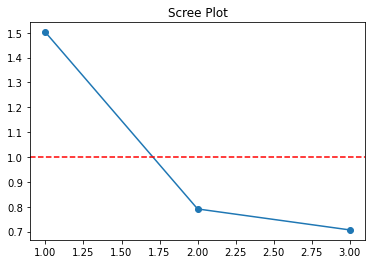

In [20]:
plt.plot(range(1, ev.shape[0]+1), ev, '-o')
plt.axhline(y = 1, c='red', ls='--') 
plt.title('Scree Plot');

Ya con nuestro número de factores obtenido anteriormente, realizamos otro FactorAnalyzer, pero con n_factors 1 y analizaremos lo que nos entrega

In [21]:
fa_2 = FactorAnalyzer(n_factors=1, rotation='varimax') # n_factors = en cuanto quiero dejarlos. # Varimax: Manera en como se va a transformar nuestra data

fa_2.fit(df_d)

c:\Users\Jony\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:626: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

Obtenemos los loadings para realizar una interpretación

In [22]:
fa_2.loadings_

loads = pd.DataFrame(fa_2.loadings_, index= df_d.columns)

loads

,0
freetime,0.464924
goout,0.592709
Dalc,0.449617


**Interpretamos:**

Para interpretar primero veremos a que corresponde cada variable

| Variable | Significado
| :---: | :---: |
| freetime | Tiempo libre fuera del colegio |
| goout | Salidas con amigos |
| Dalc | Consumo de alcohol en días de semana |

Podríamos interpretar la carga latente como *tiempo que utiliza el estudiante para salir a tomar con amigos* por lo que categorizaremos la carga latente como "Alcoholismo". Puntajes más altos indicarán un nivel más alto de alcoholismo, ya que la encuesta va desde menor a menor (1 bajo 5 mucho).

Transformamos y obtenemos nuestra carga latente en X_factor, este lo utilizaremos posteriormente en la modelación descriptiva y predictiva, para así, ver si mejora o no nuestros modelos.

In [23]:
X_factor = pd.DataFrame(fa_2.transform(df_d), columns=['alcoholismo'])

X_factor

,alcoholismo
0,0.145424
1,-0.252397
2,-0.344278
3,-0.938677
4,-0.650218
...,...
390,1.640162
391,1.443584
392,0.936401
393,-0.147700


# **3- Descripción**

Sección donde generaremos el análisis descriptivo y visual de la variables, tendremos en consideración si estas son de tipo continua o discreta.

Antes de comenzar la visualización, realizaremos un prepocesamiento del tipo de dato de las columnas, esto porque si nos fijamos, las columnas que deberían ser numéricas, están como tipo Object.

La lista de estas columnas son: age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, dalc, walc, health, absences, G1, G2 y G3

In [24]:
df.dtypes

school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime     object
studytime      object
failures       object
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel         object
freetime       object
goout         float64
Dalc           object
Walc           object
health        float64
absences       object
G1             object
G2            float64
G3             object
dtype: object

### 3.1 Transformando variables de tipo dato Object a Numéricas

In [25]:
# Lista de columnas con tipo de dato Object
lista_columnas = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3','failures']

for item in lista_columnas: # Recorremos for y transformamos con astype
    df[item] = df[item].astype('float64') 

**Comprobamos**

In [26]:
df.dtypes

school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu          float64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
studytime     float64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
G3            float64
dtype: object

Como observamos, las columnas que se encontraban en la lista han sido pasadas a numéricas de tipo float64

### 3.1 Inspección visual de variables objetivos

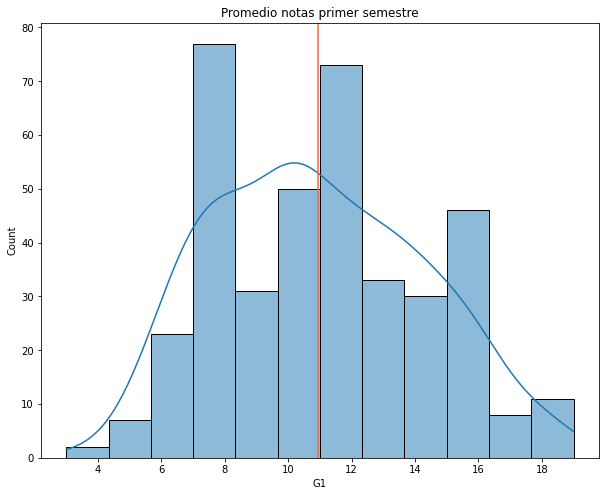

In [27]:
ut.histplot_sns(df, 'G1', 'Promedio notas primer semestre')

**Comentarios:**

El promedio de los alumnos en sus notas el primer semestre fue de 11, a simple vista no podemos notar la cantidad de alumnos que están por sobre la media y cuales debajo de la media, por lo que integraremos código para obtener estos datos

In [28]:
mean_g1 = df['G1'].mean() # Obtenemos la media de G1. Colocamos round en 0 para redondear hacía arriba o abajo

over_mean = df[df['G1']>mean_g1].shape[0]
under_mean = df[df['G1']<mean_g1].shape[0]

print(f'Media de G2: {mean_g1}')
print(f'Cantidad de alumnos sobre la media: {over_mean}')
print(f'Cantidad de alumnos bajo la media: {under_mean}')

Media de G2: 10.933503836317136
Cantidad de alumnos sobre la media: 201
Cantidad de alumnos bajo la media: 190


La data nos indica que durante el primer semestre hubo una mayor cantidad de alumnos sobre la media, por lo que podemos decir que hubo una tendencia al alto rendimiento

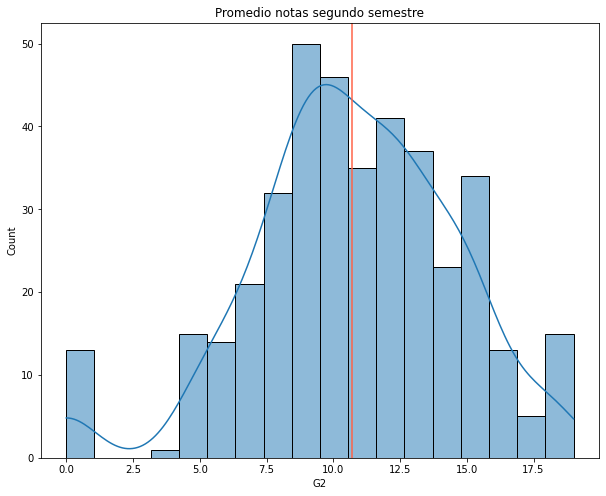

In [29]:
ut.histplot_sns(df, 'G2', 'Promedio notas segundo semestre')

**Comentarios:**

El promedio de los alumnos en sus notas el segundo semestre es de 11 aproximadamente. A simple vista no podemos notar la cantidad de alumnos que están por sobre la media y cuales debajo de la media, por lo que integraremos código para obtener estos datos.

In [30]:
mean_g2 = df['G2'].mean() # Obtenemos la media de G1. Colocamos round en 0 para redondear hacía arriba o abajo

over_mean = df[df['G2']>mean_g2].shape[0]
under_mean = df[df['G2']<mean_g2].shape[0]

print(f'Media de G2: {mean_g2}')
print(f'Cantidad de alumnos sobre la media: {over_mean}')
print(f'Cantidad de alumnos bajo la media: {under_mean}')

Media de G2: 10.713924050632912
Cantidad de alumnos sobre la media: 203
Cantidad de alumnos bajo la media: 192


La data nos indica que durante el segundo semestre hubo una mayor cantidad de alumnos sobre la media, al igual que el semestre anterior, por lo que hay una tendencia al alto rendimiento.

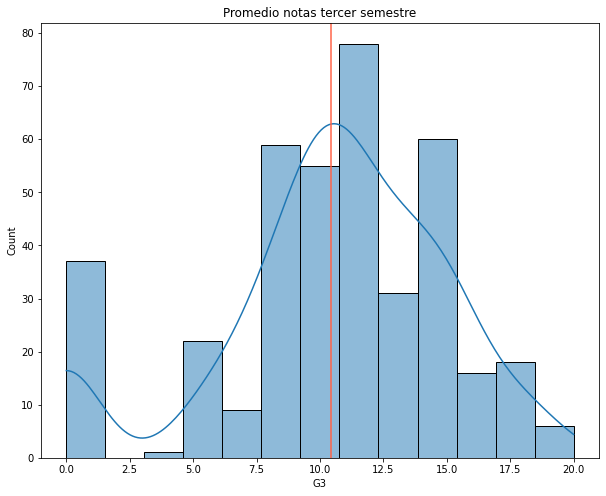

In [31]:
ut.histplot_sns(df, 'G3', 'Promedio notas tercer semestre')

**Comentarios:**

El promedio final de los alumnos es de 11 aproximadamente, al igual que los anteriores. A simple vista no podemos notar la cantidad de alumnos que están por sobre la media y cuales debajo de la media, por lo que integraremos código para obtener estos datos.

In [32]:
mean_g3 = round(df['G3'].mean(),0) # Obtenemos la media de G1. Colocamos round en 0 para redondear hacía arriba o abajo

over_mean = df[df['G3']>mean_g3].shape[0]
under_mean = df[df['G3']<mean_g3].shape[0]

print(f'Media de G3: {mean_g2}')
print(f'Cantidad de alumnos sobre la media: {over_mean}')
print(f'Cantidad de alumnos bajo la media: {under_mean}')

Media de G3: 10.713924050632912
Cantidad de alumnos sobre la media: 209
Cantidad de alumnos bajo la media: 128


> Ya con el promedio final podemos decir que hay una **mayor cantidad de alumnos con un rendimiento mayor a la media.**

### 3.2 Inspección visual de variables atributos

Dada la cantidad de variables atributos, graficaremos mediante grupos de columnas, los cuales serán 2. Contaremos con un diccionario que contenga como Key el nombre de la columna y como valor su título, para así, facilitar el entendimiento de este.

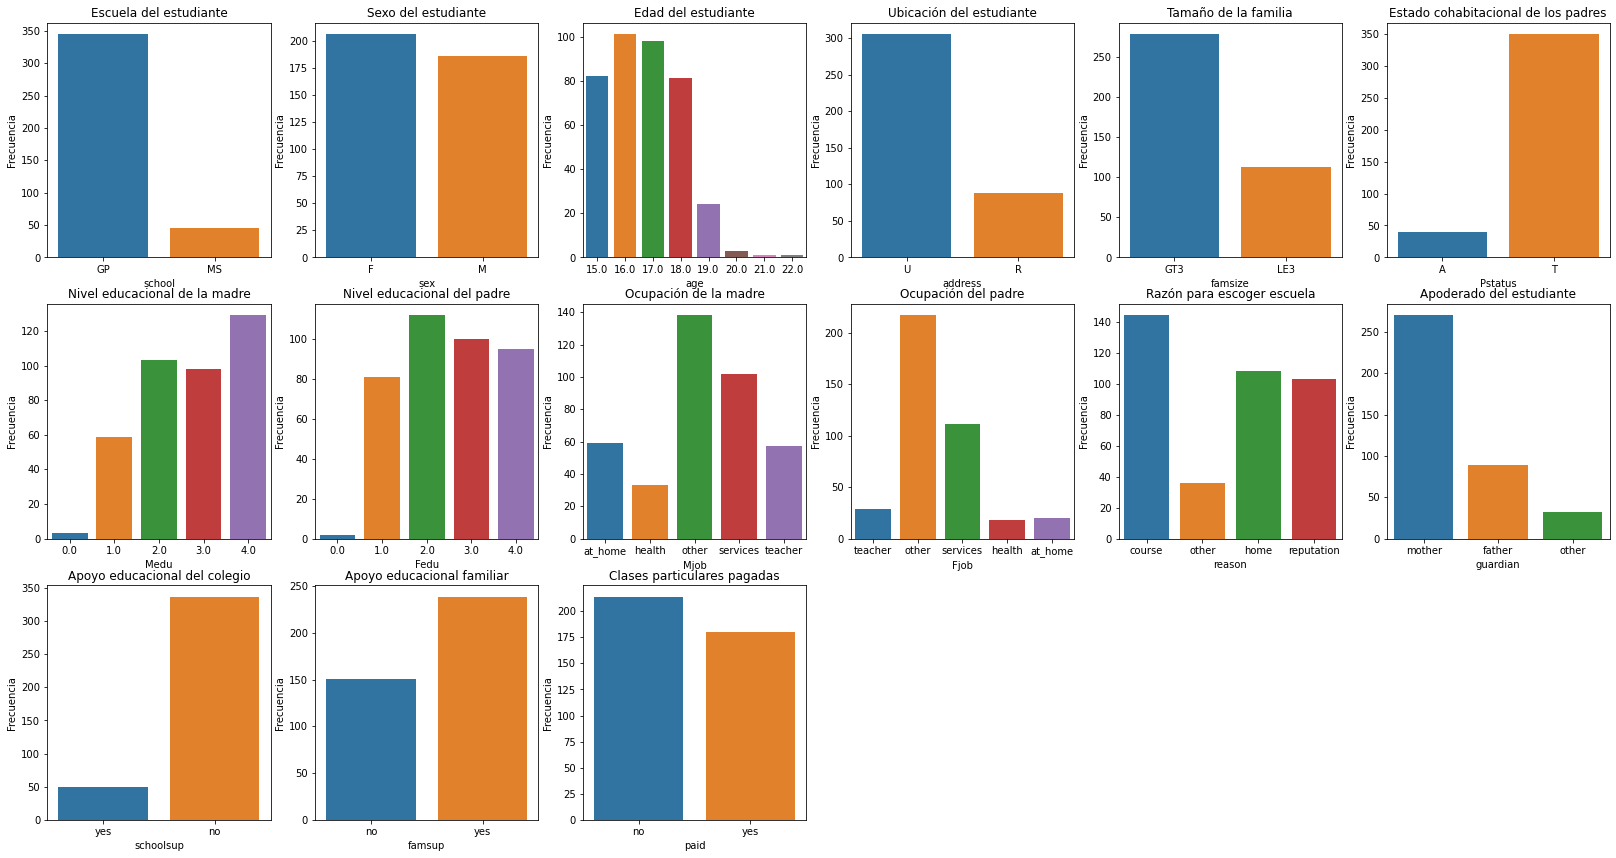

In [33]:
fig = plt.figure(figsize=(28, 25))
fig.tight_layout()

lista = ['school','sex','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid']

dict_graphic = {
    'school':'Escuela del estudiante',
    'sex':'Sexo del estudiante',
    'age':'Edad del estudiante',
    'address':'Ubicación del estudiante',
    'famsize':'Tamaño de la familia',
    'Pstatus':'Estado cohabitacional de los padres',
    'Medu':'Nivel educacional de la madre',
    'Fedu':'Nivel educacional del padre',
    'Mjob':'Ocupación de la madre',
    'Fjob':'Ocupación del padre',
    'reason':'Razón para escoger escuela',
    'guardian':'Apoderado del estudiante',
    'schoolsup':'Apoyo educacional del colegio',
    'famsup':'Apoyo educacional familiar',
    'paid':'Clases particulares pagadas'
    }

for i, item in enumerate(dict_graphic.items()):
    plt.subplot(5, 6, i+1)
    sns.countplot(data=df, x=df[item[0]])
    plt.title(item[1])
    plt.ylabel('Frecuencia')

**Explorando primer grupo de columnas:**

Iremos comentando columna por columna y obtendremos un insight resumido de estas.

* school: Notablemente la data cuenta con una mayor cantidad de alumnos de la escuela Gabriel Pereira que la escuela Moushinho da Silveira.

* sex: Existe un balance en cuanto al género de los estudiantes.

* age: Mayor cantidad de alumnos desde los 15 hasta los 18 años. Esto es lo esperado, ya que comúnmente se termina a esta edad la colegiatura.

* address: Contamos con mayor cantidad de alumnos del área urbana que la rural.

* famsize: La mayoría de los estudiantes tiene un tamaño familiar mayor a 3.

* Pstatus: En la mayoría de los estudiantes los padres cohabitan juntos.

* Entre medu y fedu: Pareciera ser a la vista que las madres tienen un mayor nivel educacional en cuanto a los padres, ya que estas tienen más educación superior que los hombres.

* Mjob: En cuanto a la ocupación de las madres, existe una mayoría en cuanto a ocupaciones no categorizadas.

* Fjob: En cuanto a la ocupación de los padres, existe una mayoría en cuanto a ocupaciones no categorizadas, al igual que las madres.

* reason: Observamos que la razón entre la reputación y la cercanía del hogar es parecida, pero la mayor razón es por la preferencia de cursos.

* guardian: De forma obvia podemos decir que la mayoría de apoderados son las madres, responsabilizándolas más por sus hijos.

* schoolsup: Sorpresivamente hay una notoriedad en cuanto al bajo apoyo de los colegios en sus estudiantes, esperaríamos que fuera lo contrario, pero no sucede.

* famsup: Mayormente las familias apoyan a sus hijos en la educación, pero aún así, existe una cantidad notoria de familias que no apoyan.

* paid: Mayormente los estudiantes no cuentan con clases particulares, aún así, la cantidad de clases pagadas igual es alta.


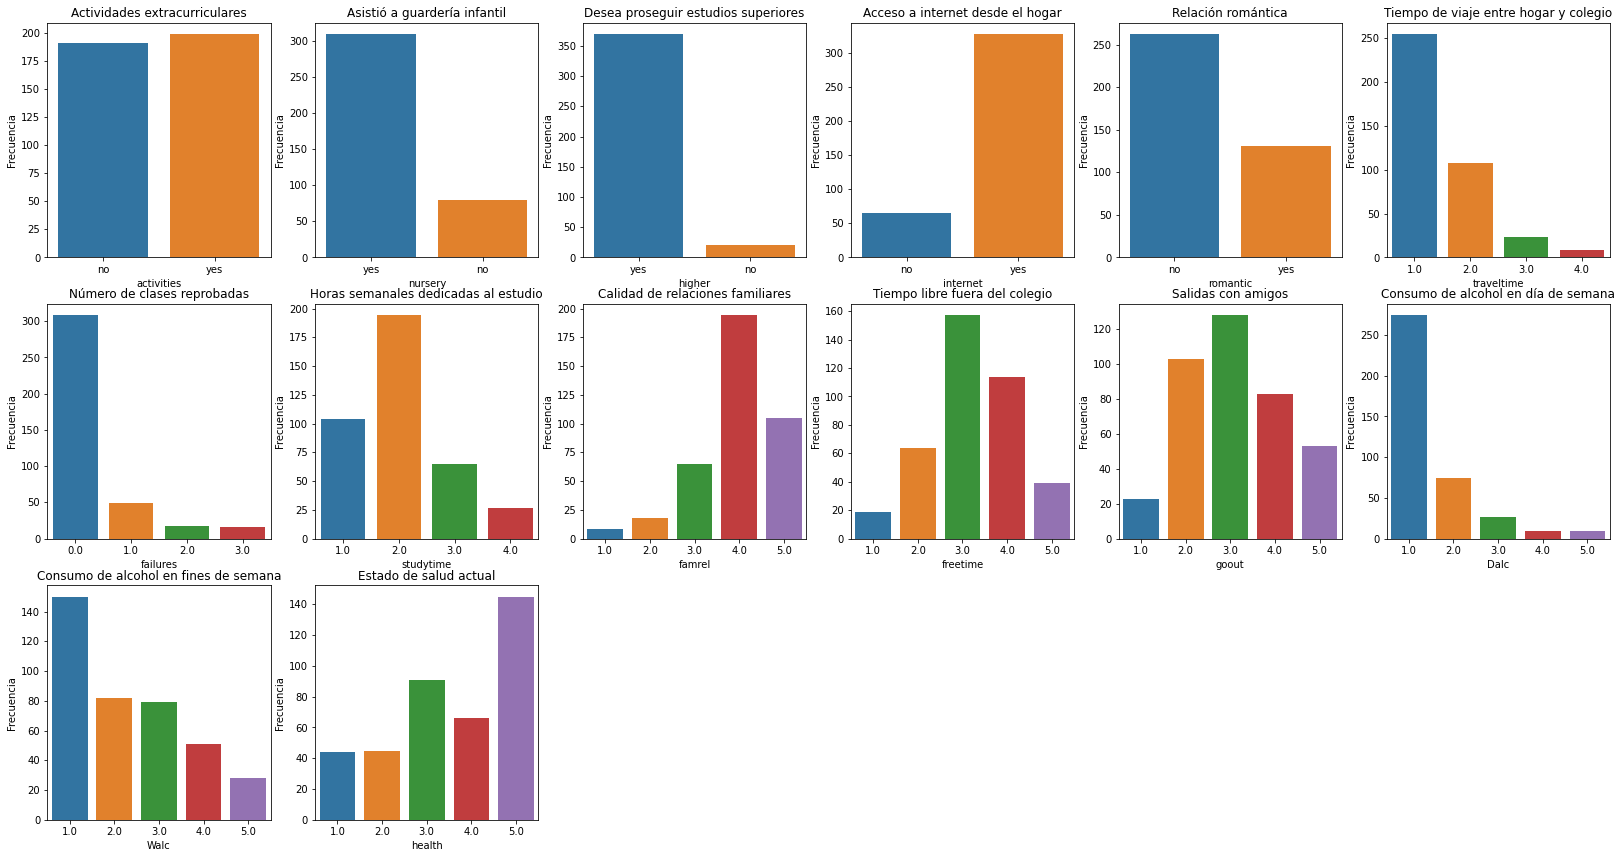

In [34]:
fig = plt.figure(figsize=(28, 25))
fig.tight_layout()

lista = ['activities','nursery','higher','internet', 'romantic','traveltime','failures','famrel','freetime','goout','Dalc','Walc','health']

dict_graphic = {    
    'activities':'Actividades extracurriculares',
    'nursery':'Asistió a guardería infantil',
    'higher':'Desea proseguir estudios superiores',
    'internet':'Acceso a internet desde el hogar',
    'romantic':'Relación romántica',
    'traveltime':'Tiempo de viaje entre hogar y colegio',
    'failures':'Número de clases reprobadas',
    'studytime':'Horas semanales dedicadas al estudio',
    'famrel':'Calidad de relaciones familiares',
    'freetime':'Tiempo libre fuera del colegio',
    'goout':'Salidas con amigos',
    'Dalc':'Consumo de alcohol en día de semana',
    'Walc':'Consumo de alcohol en fines de semana',
    'health':'Estado de salud actual'
}

for i, item in enumerate(dict_graphic.items()):
    plt.subplot(5, 6, i+1)
    sns.countplot(data=df, x=df[item[0]])
    plt.title(item[1])
    plt.ylabel('Frecuencia')

**Explorando segundo grupo de columnas:**

Insights encontrados en el segundo grupo de columnas:

* activities: Hay un balance en la cantidad de alumnos que realizan actividades extracurriculares.

* nursery: La mayoría de los estudiantes asistió a guardería infantil.

* higher: La gran mayoría de los estudiantes desea seguir con estudios superiores.

* internet: La mayoría de los estudiantes cuenta con internet en el hogar, lamentablemente existe un grupo a considerar que no tiene internet, analizaremos más en profundidad si esto afecta en las notas.

* romantic: Mayormente los estudiantes no cuentan con una relación romántica.

* traveltime: La mayoría de los estudiantes se demora menos de 15 minutos en llegar al colegio, esto es lo esperado, ya que habían muchos estudiantes en los cuales se eligió el colegio por la distancia.

* failures: Contamos con una mayor cantidad de alumnos que no han reprobado ningún curso.

* studytime: La mayoría de los estudiantes dedica de 2 a 5 horas a estudiar semanalmente y muy pocos más de 10 horas.

**Desde las columnas famrel hasta health es la batería de preguntas, donde las preguntas se respondieron desde 1 hasta 5, siendo 1 muy poco y 5 mucho**

* famrel: La mayoría de los estudiantes tiene una buena relación con sus familiares.

* freetime: La mayoría de los estudiantes dice tener una mediana cantidad de tiempo libre fuera del colegio.

* goout: La mayoría de los estudiantes dice tener una mediana cantidad de salidas con amigos.

* Dalc: La mayoría de los estudiantes dice que no tiene un alto consumo de alcohol durante los días de semana, aún así, existen estudiantes que si toman durante los días.

* Walc: La mayoría de los estudiantes dice que no toma alcohol durante los fines de semana.

* health: La mayoría de los estudiantes dice gozar de buena salud, esto estaría dentro de lo esperado, ya que hablamos de personas jóvenes.

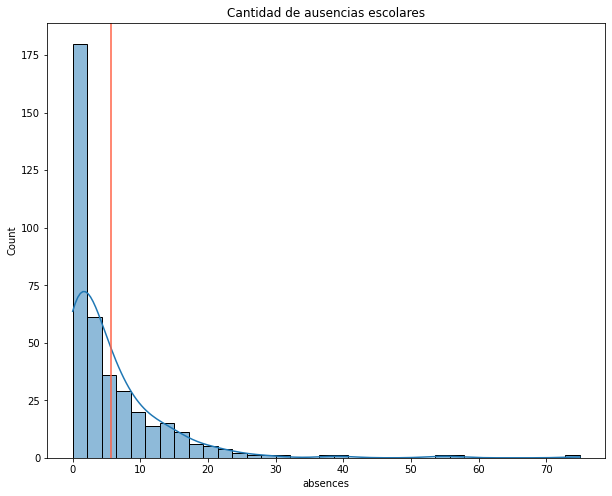

In [35]:
ut.histplot_sns(df, 'absences', 'Cantidad de ausencias escolares')

In [36]:
df['absences'].mean()

5.731457800511509

**Analizando si Internet afecta en el promedio final (G3)**

Realizamos un groupby para obtener la media de las notas de los estudiantes que tienen y no tienen internet

In [37]:
df.groupby(['internet'])[['G3']].agg(['mean'])

,G3
,mean
internet,
no,9.484375
yes,10.621538


> Al parecer no existe una gran diferencia que nos indique que en estos colegios el tener o no tener internet afecte en sus promedios finales

**Comentarios:**

En promedio los alumnos presentan 5 ausencias escolares durante el año. También podemos decir que existe un sesgo hacia una baja cantidad de ausencias escolares y que los estudiantes con una alta cantidad de ausencias estarían escapando de lo normal.

### 3.3 Inspección de correlaciones con mapa de calor

A través del mapa de calor de correlaciones, tomaremos las variables más cercanas a 1 o -1, para ver que la relación que están teniendo contra las variables objetivos.

Recordemos que no contrastaremos entre las mismas variables objetivos.

<AxesSubplot:>

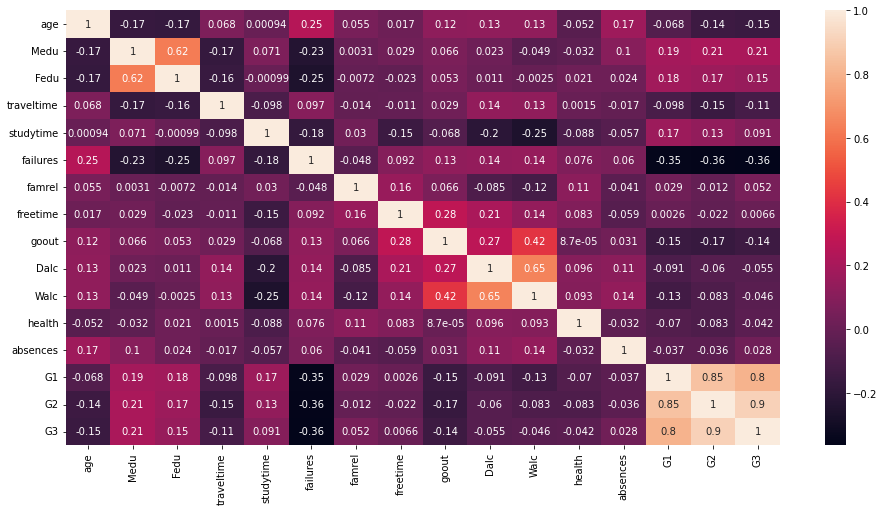

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True)

**Comentarios:**

Contrastaremos con failures ya que es el que tiene una mayor proporción inversa y con Medu, ya que tiene una mayor proporción directa. Se aplicará de la misma forma para las 3 variables objetivos.

### 3.3.1 **Variable objetivo G1**

<Figure size 1152x576 with 0 Axes>

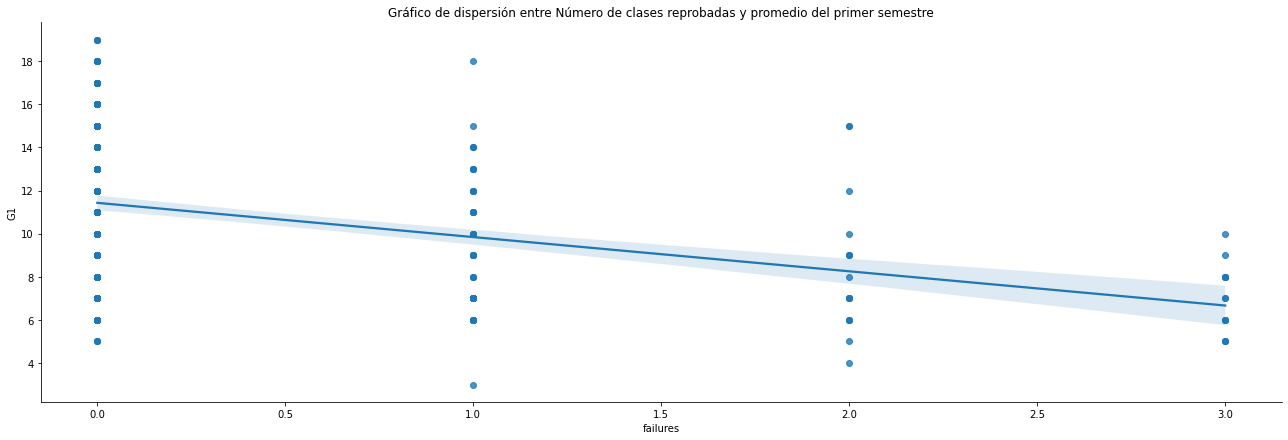

In [39]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='failures', y='G1', height=6, aspect=3);
plt.title('Gráfico de dispersión entre Número de clases reprobadas y promedio del primer semestre');

In [40]:
df['G1'].corr(df['failures'])

-0.3521401112006124

**Comentarios:**

El gráfico de dispersión nos informa una asociación negativa entre las variables. Aun que su su asociación es relativamente débil si nos fijamos en su R de pearson, esto se refleja en la nube de datos, ya que no está tan junta con respecto a la línea de regresión.

<Figure size 1152x576 with 0 Axes>

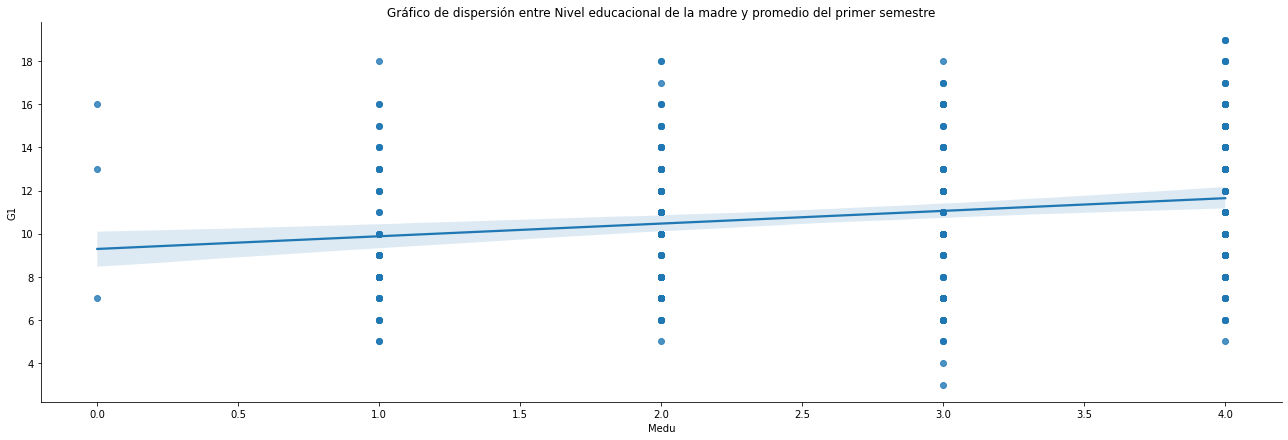

In [41]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='Medu', y='G1', height=6, aspect=3)
plt.title('Gráfico de dispersión entre Nivel educacional de la madre y promedio del primer semestre');

In [42]:
df['G1'].corr(df['Medu'])

0.1933887172176045

**Comentarios:**

El gráfico de dispersión nos informa una asociación directa entre las variables, pero con una pendiente no tan inclinada, igualmente el valor r de pearson es bajo, esto se refleja en la nube de datos ya que no se encuentran tan juntos a la recta.

### 3.3.1 **Variable objetivo G2**

Text(0.5, 1.0, 'Gráfico de dispersión entre Número de clases reprobadas y promedio del segundo semestre')

<Figure size 1152x576 with 0 Axes>

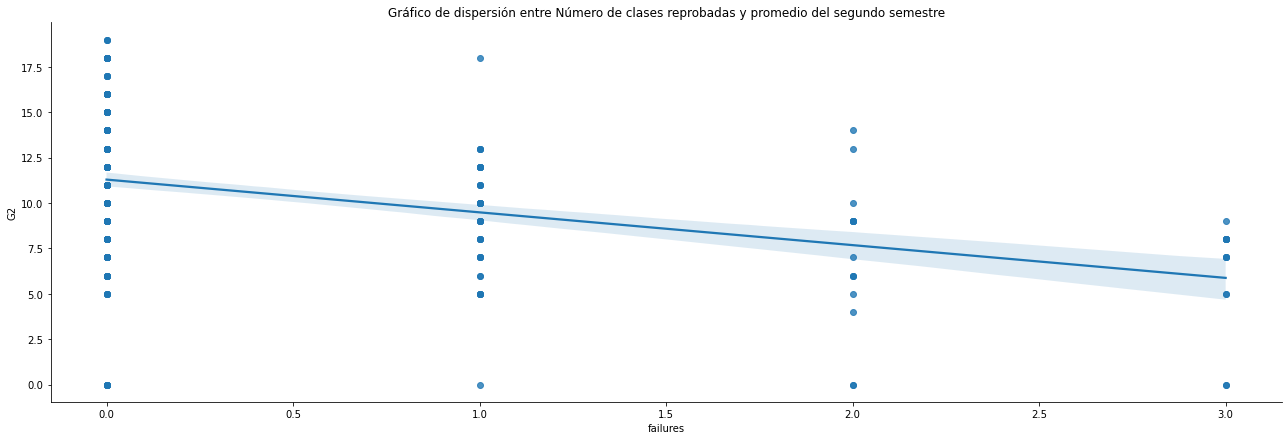

In [43]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='failures', y='G2', height=6, aspect=3);
plt.title('Gráfico de dispersión entre Número de clases reprobadas y promedio del segundo semestre')

In [44]:
df['G2'].corr(df['failures'])

-0.3574221687900316

**Comentarios:**

El gráfico de dispersión nos informa una asociación negativa entre las variables. Aun que su su asociación es relativamente débil si nos fijamos en su R de pearson, esto se refleja en la nube de datos, ya que no está tan junta con respecto a la línea de regresión.

Text(0.5, 1.0, 'Gráfico de dispersión entre Nivel educacional de la madre y promedio del segundo semestre')

<Figure size 1152x576 with 0 Axes>

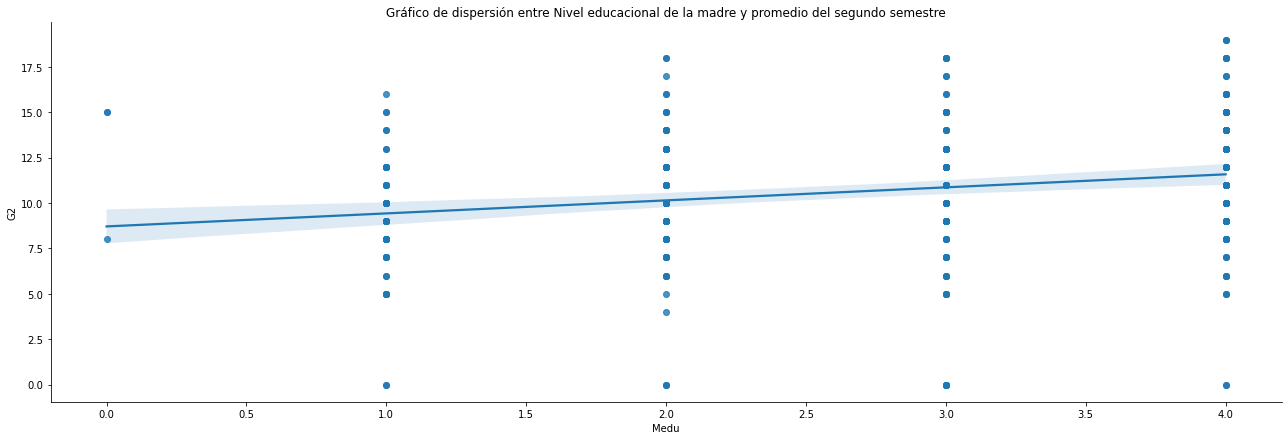

In [45]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='Medu', y='G2', height=6, aspect=3);
plt.title('Gráfico de dispersión entre Nivel educacional de la madre y promedio del segundo semestre')

In [46]:
df['G2'].corr(df['Medu'])

0.20936268295418686

**Comentarios:**

El gráfico de dispersión nos informa una asociación directa entre las variables, pero con una pendiente no tan inclinada, igualmente el valor r de perason es bajo, esto se refleja en la nube de datos ya que no se encuentran tan juntos a la recta.

### 3.3.1 **Variable objetivo G3**

Text(0.5, 1.0, 'Gráfico de dispersión entre Número de clases reprobadas y promedio del tercer semestre')

<Figure size 1152x576 with 0 Axes>

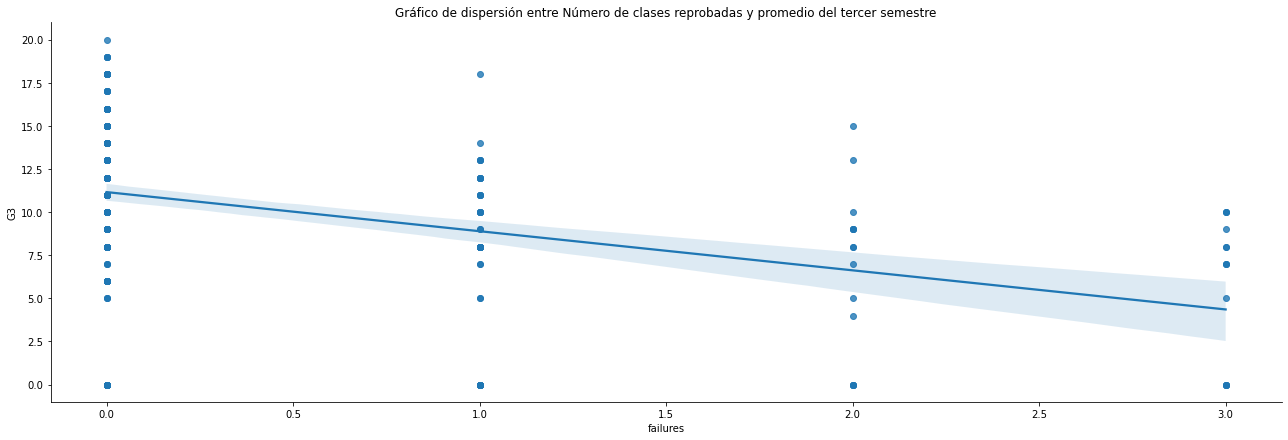

In [47]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='failures', y='G3', height=6, aspect=3);
plt.title('Gráfico de dispersión entre Número de clases reprobadas y promedio del tercer semestre')

In [48]:
df['G3'].corr(df['failures'])

-0.36425777594934194

**Comentarios:**

El gráfico de dispersión nos informa una asociación negativa entre las variables. Aun que su asociación es relativamente débil si nos fijamos en su R de pearson, esto se refleja en la nube de datos, ya que no está tan junta con respecto a la línea de regresión.

Text(0.5, 1.0, 'Gráfico de dispersión entre Nivel educacional de la madre y promedio del tercer semestre')

<Figure size 1152x576 with 0 Axes>

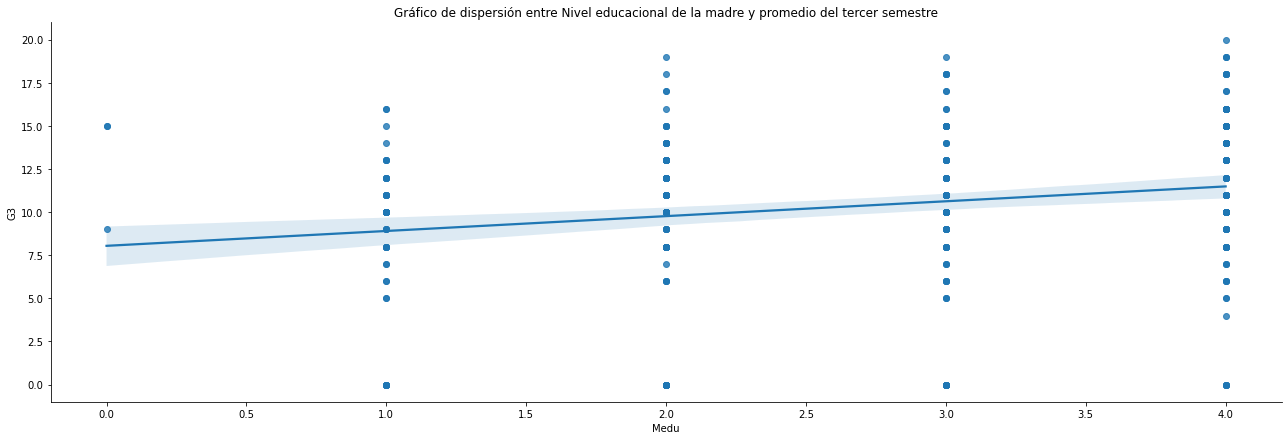

In [49]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df, x='Medu', y='G3', height=6, aspect=3);
plt.title('Gráfico de dispersión entre Nivel educacional de la madre y promedio del tercer semestre')

In [50]:
df['G3'].corr(df['Medu'])

0.2062739437051543

**Comentarios:**

El gráfico de dispersión nos informa una asociación directa entre las variables, pero con una pendiente no tan inclinada, igualmente el valor r de pearson es bajo, esto se refleja en la nube de datos ya que no se encuentran tan juntos a la recta.

### 3.4 **Inspeccionando normalidad de variables objetivos**

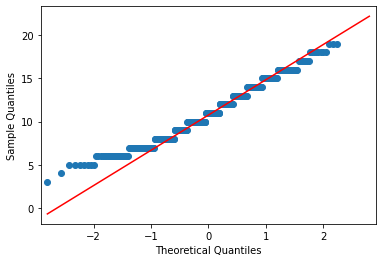

In [51]:
sm.qqplot(df['G1'],line='q');

**Comentarios:**

El gráfico nos dice que la variable escapa de los valores esperados en el extremo inferior de la distribución.

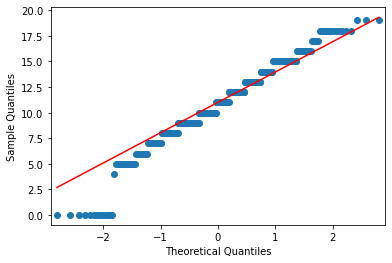

In [52]:
sm.qqplot(df['G2'],line='q');

**Comentarios:**

El gráfico nos dice que la variable escapa de los valores esperados en el extremo inferior de la distribución.

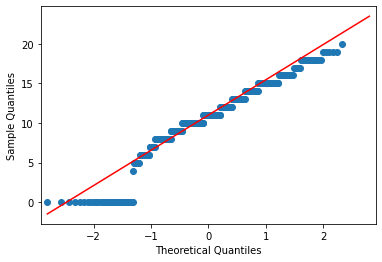

In [53]:
sm.qqplot(df['G3'],line='q');

**Comentarios:**

El gráfico nos dice que la variable escapa de los valores esperados en el extremo inferior de la distribución.

### 3.5 Inspección de las variables perdidas en el DataSet

Para inspeccionar los datos perdidos en nuestro dataframe, contamos con una función llamada 'obs_perdidas', en la cual ingresamos el dataframe, el vector a inspeccionar y este nos retorna la cantidad de casos perdidos y el porcentaje de este, la función también cuenta con una opción que nos permite ver la lista de casos perdidos, por tema de tamaño de la data optaremos por dejar este valor en False, el cual ya está por defecto.

Para facilitar la inspección, realizaremos un for junto con la función para obtener todos los datos perdidos en las columnas.

In [54]:
for column in df:
    ut.obs_perdidas(df, column)

Cantidad de casos perdidos en school: 5, 1.27%
Cantidad de casos perdidos en sex: 3, 0.76%
Cantidad de casos perdidos en age: 4, 1.01%
Cantidad de casos perdidos en address: 2, 0.51%
Cantidad de casos perdidos en famsize: 4, 1.01%
Cantidad de casos perdidos en Pstatus: 6, 1.52%
Cantidad de casos perdidos en Medu: 3, 0.76%
Cantidad de casos perdidos en Fedu: 5, 1.27%
Cantidad de casos perdidos en Mjob: 6, 1.52%
Cantidad de casos perdidos en Fjob: 0, 0.00%
Cantidad de casos perdidos en reason: 4, 1.01%
Cantidad de casos perdidos en guardian: 4, 1.01%
Cantidad de casos perdidos en traveltime: 3, 0.76%
Cantidad de casos perdidos en studytime: 5, 1.27%
Cantidad de casos perdidos en failures: 5, 1.27%
Cantidad de casos perdidos en schoolsup: 8, 2.03%
Cantidad de casos perdidos en famsup: 5, 1.27%
Cantidad de casos perdidos en paid: 1, 0.25%
Cantidad de casos perdidos en activities: 5, 1.27%
Cantidad de casos perdidos en nursery: 6, 1.52%
Cantidad de casos perdidos en higher: 6, 1.52%
Cantida

**Inspeccionamos de manera visual**

Realizamos un gráfico de datos perdidos con missingno para inspeccionar de manera visual

<Figure size 288x288 with 0 Axes>

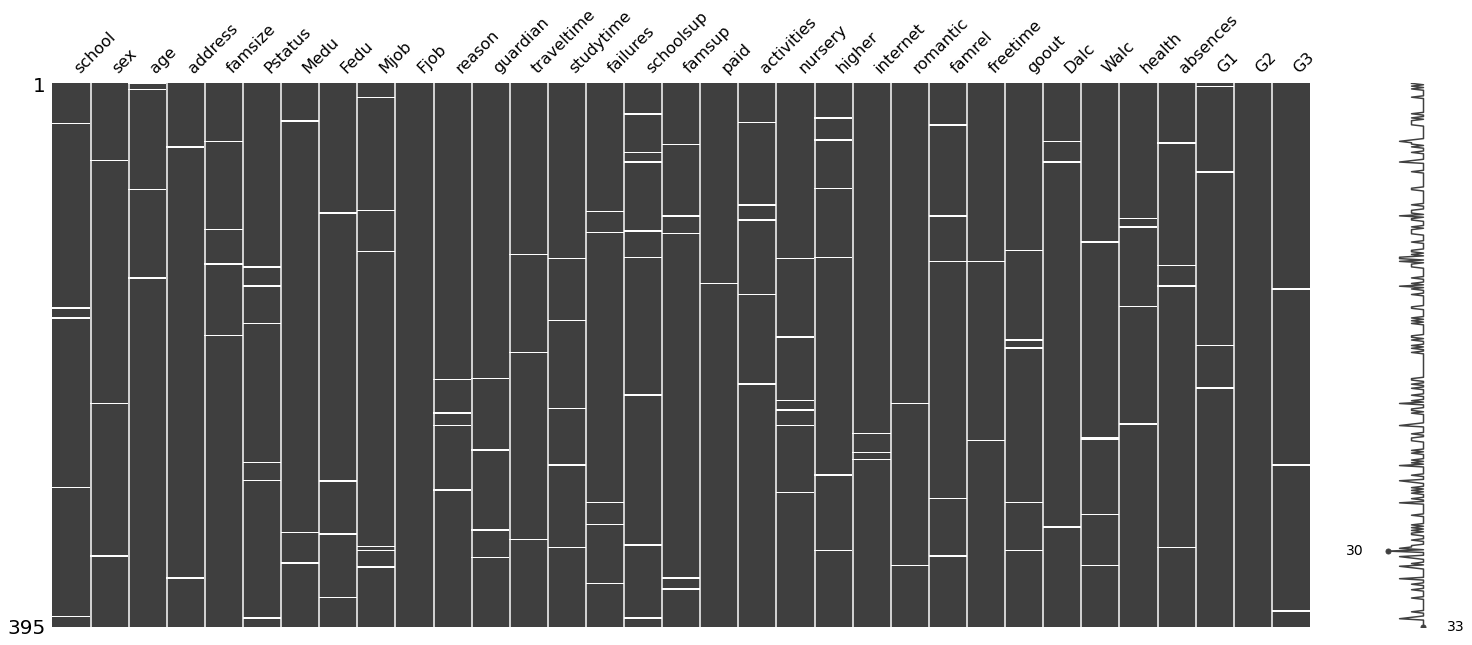

In [55]:
import missingno as msngo

plt.figure(figsize=(4,4))
msngo.matrix(df);

**Comentarios:**

Observamos un equilibrio de datos perdidos en las columnas y no hay alguna variable que sea tentativa para su eliminación.

# **4- Modelación Descriptiva**

En esta sección, inspeccionaremos el modelo de regresión líneal y describiremos como las variables atributos afectan en las notas de los alumnos.

Tendremos 3 modelos descriptivos, los cuales serán para G1, G2 y G3, en su orden respectivo. Cada modelo tendrá uno de base, en el cuál iremos experimentando y depurando mediante el VIF de las variables, eliminando variables con p-value mayor a 0.05, escalamiento ... ETC. Todo esto para encontrar el mejor modelo posible.

Antes de comenzar a modelar, definiremos las estrategias para el procesamiento métricas con las que mediremos el poder explicativo.

### 4.1 Estrategia para modelar

Para realizar la modelación descriptiva, tendremos que tratar los datos perdidos, variables categóricas y binarización de las variables correspondientes, ya que generan error en la modelación, además de un escalamiento en los números. La estragia será la siguiente:

* Binarización: Las variables categóricas binarias, serán llevadas a 0 y 1, en la cúal el 1 corresponderá a las categorías minoritarias.

* Datos perdidos: Los datos perdidos en las variables categóricas serán imputadas por la moda y las variables continuas por la media.

* Variables categóricas: Serán transformadas con una función que reconoce el orden y les asigna un número por categoría, desde la menor a la mayor.

* Escalamiento de números: Utilizaremos un StandarEscaler, al cual le aplicaremos un SklearTransformerWrapper.

Primero utilizaremos una copia de nuestro dataset en df_recod, esto para no seguir modificando la data original.

In [56]:
df_recod = df.copy()

#### 4.1.1 Binarización de las variables binarias

Las variables a binarizar son: school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.

> La función binarize_categorical deja la clase mayoritaria en 1 y la minoritaria como 0

In [57]:
lista_bin = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for item in lista_bin:
    df_recod[item] = ut.binarize_categorical(df_recod, item)


Comprobamos en una columna

In [58]:
df_recod['school'].value_counts()

0.0    345
1.0     45
Name: school, dtype: int64

#### 4.1.2 Binarización de las variables categóricas

Para binarizar las variables nominales que contengan más de 2 categorías, seguiremos la lógica inversa de la binarización anterior, en la cual 0 es la clase mayoritaria y 1 la clase minoritaria. Por lo tanto, si seguimos la lógica inversa, una variable nominal con 5 categorías quedaría de la siguiente forma:

>0 Clase mayoritaria .... 1 Clase minoritaria **Ejemplo para seguir la lógica**

>0(Categoría minoritaria) .... 5 (Categoría mayoritaria)

Esto lo realizaremos con la misma función binarize_categorical que utilizamos anteriormente, que deja las clases mayoritarias en el número menor y las minoritarias en el número mayor.

In [59]:
lista_bin_categories = ['Mjob','Fjob','reason','guardian'] 

for item in lista_bin_categories:
    df_recod[item] = ut.categorical_to_number(df_recod, item)

Comprobamos en una columna

In [60]:
df_recod['Mjob'].value_counts()

4.0    138
3.0    102
2.0     59
1.0     57
0.0     33
Name: Mjob, dtype: int64

In [61]:
df['Mjob'].value_counts()

other       138
services    102
at_home      59
teacher      57
health       33
Name: Mjob, dtype: int64

#### 4.1.3 Tratando datos perdidos

Imputaremos los datos perdidos por la mediana, esto por el siguiente motivo. Si exploramos nuestros datos, nos damos cuenta que todas las variables son números enteros y están representando alguna categoría, por ejemplo, en traveltime, no podemos tener un dato decimal ya que está representando 1 si es menor a 15, 2 si es de 15 a 30 min y así en este orden, entonces un valor decimal en esta columna no se podría interpretar muy bien, de igual manera en la batería de preguntas, ya que van desde el 1 al 5 y cada uno de estos datos representa una categoría que va desde muy bajo a muy alto. En edad del estudiante no podemos interpretar un estudiante con 15.5 de edad. Por lo tanto, tomando este análisis, interpretamos a todas las variables como enteros y al ser de esta manera, las imputaremos por la mediana.

In [62]:
mmi = MeanMedianImputer(imputation_method='median')

df_final = mmi.fit_transform(df_recod)

df_final

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,17.0,0.0,0.0,1.0,4.0,4.0,2.0,2,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,2.0,4,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,0.0,0.0,15.0,0.0,1.0,0.0,1.0,1.0,2.0,4,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,11.0,8.0,10.0
3,0.0,0.0,15.0,0.0,0.0,0.0,4.0,2.0,0.0,3,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,0.0,0.0,17.0,0.0,0.0,0.0,3.0,3.0,4.0,4,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20.0,0.0,1.0,1.0,2.0,2.0,3.0,3,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,1.0,1.0,17.0,0.0,1.0,0.0,3.0,1.0,3.0,3,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0
392,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,4.0,4,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
393,1.0,1.0,18.0,1.0,1.0,0.0,3.0,2.0,3.0,4,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0


### 4.2 Modelos descriptivos de G1, G2 y G3

Para el modelamiento descriptivo, obtendremos un modelo base por cada variable objetivo y los iremos depurando por su VIF, PVALUE y realizaremos escalamiento de números.

Por temas prácticos, analizaremos los coeficientes de los modelos en el mejor que encontremos por cada uno.

**4.2.1 G1 - Modelo base**

In [63]:
import statsmodels.api as sm 

X = df_final.drop(columns=['G1','G2','G3'])
y = df_final.G1

X_full = sm.add_constant(X) # Agregamos intercepto

model_base = sm.OLS(y, X_full).fit()
model_base.summary()

X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0.0,0.0,17.0,0.0,0.0,1.0,4.0,4.0,2.0,2,...,0.0,1.0,0.0,4.0,3.0,4.0,1.0,1.0,3.0,6.0
1,0.0,0.0,17.0,0.0,0.0,0.0,1.0,1.0,2.0,4,...,0.0,0.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,4.0
2,0.0,0.0,15.0,0.0,1.0,0.0,1.0,1.0,2.0,4,...,0.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,0.0,0.0,15.0,0.0,0.0,0.0,4.0,2.0,0.0,3,...,0.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,0.0,0.0,17.0,0.0,0.0,0.0,3.0,3.0,4.0,4,...,0.0,1.0,0.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20.0,0.0,1.0,1.0,2.0,2.0,3.0,3,...,0.0,1.0,0.0,5.0,5.0,4.0,4.0,5.0,4.0,11.0
391,1.0,1.0,17.0,0.0,1.0,0.0,3.0,1.0,3.0,3,...,0.0,0.0,0.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0
392,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,4.0,4,...,0.0,1.0,0.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0
393,1.0,1.0,18.0,1.0,1.0,0.0,3.0,2.0,3.0,4,...,0.0,0.0,0.0,4.0,4.0,1.0,3.0,4.0,5.0,0.0


Depuraremos el modelo base mediante el VIF, tendremos un criterio de corte de 10, siendo que iremos eliminando las variables con un vif mayor a este y hasta que todas estén bajo 10

In [64]:
vif, indices = ut.VIF(X,vars_to_ignore=['age','famrel','Medu','freetime','goout','Fjob'])

vif

school        1.417309
sex           2.494535
address       1.627687
famsize       1.536750
Pstatus       1.217432
Fedu          6.121222
Mjob          5.293638
reason        4.926792
guardian      7.007607
traveltime    5.912904
studytime     6.500063
failures      1.498159
schoolsup     1.249099
famsup        1.912389
paid          2.231644
activities    2.069085
nursery       1.352621
higher        1.264287
internet      1.376280
romantic      1.652550
Dalc          6.983742
Walc          7.841381
health        7.687760
absences      1.676372
dtype: float64

Ya con las variables encontradas a ignorar para bajar la multicolinealidad en el modelo, procedemos a armarlo nuevamente, pero sin estas variables y ver en que cambiaron las métricas

**G1 - Modelo Depurado por VIF**

In [65]:
X = df_final.drop(columns=['G1','G2','G3','age','famrel','Medu','freetime','goout','Fjob'])
y = df_final.G1

X_full = sm.add_constant(X) # Agregamos intercepto

model_vif = sm.OLS(y, X_full).fit()

In [66]:
print('Modelo base:')
ut.model_metrics(model_base)
print('')
print('***********')
print('')
print('Modelo vif:')
ut.model_metrics(model_vif)

Modelo base:
R cuadrado ajustado: 0.21
Model AIC: 2001.93
Model BIC: 2125.28
Model Cond. no: 400.69

***********

Modelo vif:
R cuadrado ajustado: 0.20
Model AIC: 2000.81
Model BIC: 2100.29
Model Cond. no: 90.19


**Observaciones:**

* La multicolinealidad bajó considerablemente desde 400 a 90.

* A pesar de que nuestro R2 ajustado bajó una decima, el AIC y BIC indican que sería un mejor modelo que el anterior.

**G1 - Modelo depurado por VIF y Pvalue**

Tomaremos el modelo anterior y depuraremos eliminando las variables con un pvalue mayor a 0.05, ya que nos estarían indicando que no tienen significancia en la variable G1.

In [67]:
X = df_final.drop(columns=['G1','G2','G3','nursery','traveltime','Pstatus','age','school','Dalc','famrel','Medu','activities','guardian','internet','romantic','absences',
'paid','Walc','reason','address','famsize','health','freetime','Fedu'])
y = df_final.G1

X_full = sm.add_constant(X)  # Agregamos intercepto

model_vif_pvalue = sm.OLS(y, X_full).fit()
model_vif_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.77e-19
Time:                        15:05:33   Log-Likelihood:                -976.77
No. Observations:                 395   AIC:                             1974.
Df Residuals:                     385   BIC:                             2013.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8683      0.810     15.882      0.000      11.275      14.461
sex            0.8265      0.315      2.626      0.009       0.208       1.445
Mjob          -0.2556      0.117     -2.188      0.029      -0.485      -0.026
Fjob          -0.3938      0.140     -2.811      0.005      -0.669      -0.118
studytime      0.5483      0.188      2.911      0.004       0.178       0.919
failures      -1.2384      0.211     -5.871      0.000      -1.653      -0.824
schoolsup     -1.8168      0.452     -4.016      0.000      -2.706      -0.927
famsup         0.7363      0.313      2.355      0.019       0.122       1.351
higher        -1.5313      0.712     -2.151      0.032      -2.931      -0.132
goout         -0.3382      0.133     -2.535      0.012      -0.600      -0.076
==============================================================================
Omnibus:                        7.510   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.823
Skew:                           0.194   Prob(JB):                       0.0544
Kurtosis:                       2.548   Cond. No.                         33.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print('Modelo VIF:')
ut.model_metrics(model_vif)
print('')
print('***********')
print('')
print('Modelo vif y pvalue:')
ut.model_metrics(model_vif_pvalue)

Modelo VIF:
R cuadrado ajustado: 0.20
Model AIC: 2000.81
Model BIC: 2100.29
Model Cond. no: 90.19

***********

Modelo vif y pvalue:
R cuadrado ajustado: 0.23
Model AIC: 1973.55
Model BIC: 2013.34
Model Cond. no: 33.40


**Observaciones:**

* R cuadrado ajustado mejoró mínimamente, pero aún así, subió.

* AIC y BIC del model pvalue indican que el modelo vif-pvalue estaría siendo mejor.

* Sigue bajando considerablemente el Conditional Number.

**G1- Modelo agregando carga latente**

In [69]:
df_factor = pd.concat([df_final, X_factor], axis=1)

X = df_factor.drop(columns=['G1','G2','G3','nursery','traveltime','Pstatus','age','school','Dalc','famrel','Medu','activities','guardian','internet','romantic','absences',
'paid','Walc','reason','address','famsize','health','freetime','Fedu'])

y = df_factor.G1

X_full = sm.add_constant(X) # Agregamos intercepto

model_factor = sm.OLS(y, X_full).fit()
model_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     12.43
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           9.48e-19
Time:                        15:05:33   Log-Likelihood:                -976.65
No. Observations:                 395   AIC:                             1975.
Df Residuals:                     384   BIC:                             2019.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.1771      1.018     12.942      0.000      11.175      15.179
sex             0.7794      0.329      2.371      0.018       0.133       1.426
Mjob           -0.2584      0.117     -2.207      0.028      -0.489      -0.028
Fjob           -0.3911      0.140     -2.787      0.006      -0.667      -0.115
studytime       0.5602      0.190      2.948      0.003       0.187       0.934
failures       -1.2473      0.212     -5.887      0.000      -1.664      -0.831
schoolsup      -1.8167      0.453     -4.012      0.000      -2.707      -0.926
famsup          0.7479      0.314      2.384      0.018       0.131       1.365
higher         -1.5280      0.713     -2.144      0.033      -2.929      -0.127
goout          -0.4393      0.242     -1.817      0.070      -0.915       0.036
alcoholismo     0.1936      0.386      0.502      0.616      -0.565       0.952
==============================================================================
Omnibus:                        7.309   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.834
Skew:                           0.202   Prob(JB):                       0.0541
Kurtosis:                       2.562   Cond. No.                         43.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
print('Modelo vif-pvalue:')
ut.model_metrics(model_vif_pvalue)
print('')
print('***********')
print('')
print('Modelo factor:')
ut.model_metrics(model_factor)

Modelo vif-pvalue:
R cuadrado ajustado: 0.23
Model AIC: 1973.55
Model BIC: 2013.34
Model Cond. no: 33.40

***********

Modelo factor:
R cuadrado ajustado: 0.22
Model AIC: 1975.29
Model BIC: 2019.06
Model Cond. no: 43.00


**Observaciones:**

* Modelo con carga latente alcoholismo no mejora ni empeora substancialmente.

* Conditional Number aumenta, esto es un downgrade.

* Carga latente al parecer no es significativa, ya que es mayor a 0.05

Ya encontrando nuestro mejor modelo por pvalue y vif, intentaremos mejorarlo con un escalamiento en los números

**G1- Modelo vif-pvalue escalado**

In [71]:
X = df_final.drop(columns=['G1','G2','G3','nursery','traveltime','Pstatus','age','school','Dalc','famrel','Medu','activities','guardian','internet','romantic','absences',
'paid','Walc','reason','address','famsize','health','freetime','Fedu'])
y = df_final.G1


sc = SklearnTransformerWrapper(StandardScaler())
X_sc = sc.fit_transform(X)

X_full = sm.add_constant(X_sc) # Estoy agregando el intercepto

model_vif_pvalue_sc = sm.OLS(y, X_full).fit()
model_vif_pvalue_sc.summary()

print('Modelo pvalue:')
ut.model_metrics(model_vif_pvalue)
print('')
print('***********')
print('')
print('Modelo pvalue escalado:')
ut.model_metrics(model_vif_pvalue_sc)

Modelo pvalue:
R cuadrado ajustado: 0.23
Model AIC: 1973.55
Model BIC: 2013.34
Model Cond. no: 33.40

***********

Modelo pvalue escalado:
R cuadrado ajustado: 0.23
Model AIC: 1973.55
Model BIC: 2013.34
Model Cond. no: 1.71


**Observaciones:**

A pesar del escalamiento, no se nota ninguna mejora, las métricas del modelo se quedan estaticas, a excepción del Conditional Number que baja aún más, casi llegando a 0, por lo tanto, procederemos a interpretar los coeficientes del modelo vif-pvalue-escalado.

**Interpretando coeficientes modelo vif-p-value-escalado**

In [72]:
model_vif_pvalue_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.77e-19
Time:                        15:05:34   Log-Likelihood:                -976.77
No. Observations:                 395   AIC:                             1974.
Df Residuals:                     385   BIC:                             2013.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9342      0.146     74.784      0.000      10.647      11.222
sex            0.4125      0.157      2.626      0.009       0.104       0.721
Mjob          -0.3345      0.153     -2.188      0.029      -0.635      -0.034
Fjob          -0.4276      0.152     -2.811      0.005      -0.727      -0.128
studytime      0.4587      0.158      2.911      0.004       0.149       0.769
failures      -0.9191      0.157     -5.871      0.000      -1.227      -0.611
schoolsup     -0.6041      0.150     -4.016      0.000      -0.900      -0.308
famsup         0.3578      0.152      2.355      0.019       0.059       0.656
higher        -0.3357      0.156     -2.151      0.032      -0.643      -0.029
goout         -0.3751      0.148     -2.535      0.012      -0.666      -0.084
==============================================================================
Omnibus:                        7.510   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.823
Skew:                           0.194   Prob(JB):                       0.0544
Kurtosis:                       2.548   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
df['G1'].mean()

10.933503836317136

**Interpretaciones:**

* Nuestra constante quedó igual a la media de G1, esto es bueno ya que es donde comienza a predecir.

* sex: Afecta de manera positiva, cuando sex aumenta en una unidad la nota sube en 0.41, ósea que cuando el estudiante es hombre[clase 1] nos dice que la nota subirá en 0.4606.

* Mjob: A medida que Mjob sube en 1 unidad, la nota promedio del primer semestre debería disminuir en -0.3345.

* Fjob: A medida que Fjob sube en 1 unidad, la nota promedio del primer semestre debería disminuir en -0.4276.

* studytime: A medida que el estudiante aumenta su tiempo de estudio, la nota va a ir en aumento en 0.4587, esto sería lo lógico, ya que si lo pensamos, mientras más tiempo estudiamos, mejor nos debería ir en las pruebas. 

* failures: A medida que el estudiante aumenta el Número de clases reprobada, sus notas van a bajar en -0.9191, esto también es lógico, si me va mal en los cursos, se verá reflejado en mis notas.

* schoolsup: Sorpresivamente si el colegio presta apoyo al estudiante, su promedio de nota baja en -0.6041. Quizás estamos hablando de colegios con estudiantes de riesgo social, donde si es necesario prestar ayuda al estudiante, es porque están con un rendimiento bajo.

* famsup: Si famsup aumenta en 1, la nota del estudiante aumentará en 0.3578. Esto quiere que decir que un alumno que cuente con apoyo educacional familiar, aumentará su nota.

* higher: Sorpresivamente si el estudiante desea proseguir con estudios superiores, su nota promedio va a descender en -0.3357. Quizás los estudiantes se ven presionados a responder que desean seguir con estudios superiores y esto no tiene un reflejo correspondiente al que esperaríamos.

* goout: A medida que el estudiante aumenta sus salidas con amigos, su nota promedio descenderá en -0.3751.

**4.2.2 G2 - Modelo base**

Por temas prácticos revisaremos los coeficientes hasta encontrar 

In [74]:
X_base = df_final.drop(columns=['G1','G2','G3'])
y = df_final.G2

X_full = sm.add_constant(X_base) # Agregamos intercepto
modelg2_base = sm.OLS(y, X_full).fit()

modelg2_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     4.309
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.69e-12
Time:                        15:05:34   Log-Likelihood:                -1023.3
No. Observations:                 395   AIC:                             2109.
Df Residuals:                     364   BIC:                             2232.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3979      3.283      4.995      0.000       9.942      22.854
school         0.3839      0.634      0.605      0.545      -0.863       1.631
sex            0.8464      0.403      2.098      0.037       0.053       1.640
age           -0.1928      0.170     -1.137      0.256      -0.526       0.141
address       -0.5353      0.469     -1.142      0.254      -1.457       0.386
famsize        0.5690      0.396      1.438      0.151      -0.209       1.347
Pstatus        0.3772      0.593      0.636      0.525      -0.788       1.543
Medu           0.2707      0.226      1.199      0.231      -0.173       0.714
Fedu           0.0445      0.219      0.204      0.839      -0.385       0.474
Mjob          -0.0763      0.148     -0.514      0.607      -0.368       0.216
Fjob          -0.1933      0.175     -1.105      0.270      -0.537       0.151
reason        -0.2924      0.179     -1.638      0.102      -0.643       0.059
guardian      -0.3241      0.302     -1.074      0.283      -0.917       0.269
traveltime    -0.3544      0.274     -1.295      0.196      -0.892       0.184
studytime      0.5079      0.231      2.198      0.029       0.053       0.962
failures      -1.2919      0.266     -4.862      0.000      -1.815      -0.769
schoolsup     -1.3280      0.551     -2.410      0.016      -2.412      -0.244
famsup         0.7756      0.388      1.999      0.046       0.013       1.538
paid           0.1713      0.384      0.446      0.656      -0.584       0.926
activities     0.1076      0.358      0.300      0.764      -0.597       0.813
nursery       -0.0952      0.445     -0.214      0.831      -0.970       0.780
higher        -0.9926      0.861     -1.153      0.250      -2.686       0.701
internet      -0.7487      0.496     -1.508      0.132      -1.725       0.228
romantic      -0.8077      0.381     -2.121      0.035      -1.556      -0.059
famrel        -0.0929      0.201     -0.462      0.644      -0.488       0.302
freetime       0.1298      0.190      0.683      0.495      -0.244       0.504
goout         -0.4915      0.182     -2.700      0.007      -0.849      -0.133
Dalc          -0.0898      0.267     -0.337      0.737      -0.614       0.434
Walc           0.0840      0.199      0.422      0.673      -0.307       0.475
health        -0.1200      0.130     -0.921      0.358      -0.376       0.136
absences       0.0035      0.023      0.150      0.881      -0.042       0.049
==============================================================================
Omnibus:                       18.186   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.487
Skew:                          -0.440   Prob(JB):                     2.16e-05
Kurtosis:                       3.730   Cond. No.                         401.
==

Depuramos el modelo mediante VIF

In [75]:
vif, indices = ut.VIF(X_base,vars_to_ignore=['age','famrel','Medu','freetime','goout','Fjob']) #['age','famrel','Medu','freetime','goout']

vif

school        1.417309
sex           2.494535
address       1.627687
famsize       1.536750
Pstatus       1.217432
Fedu          6.121222
Mjob          5.293638
reason        4.926792
guardian      7.007607
traveltime    5.912904
studytime     6.500063
failures      1.498159
schoolsup     1.249099
famsup        1.912389
paid          2.231644
activities    2.069085
nursery       1.352621
higher        1.264287
internet      1.376280
romantic      1.652550
Dalc          6.983742
Walc          7.841381
health        7.687760
absences      1.676372
dtype: float64

Ya obteniendo las columnas a ignorar, modelamos sin estas.

**G2 - Modelo Depurado por VIF**

In [76]:
X = df_final.drop(columns=['G1','G2','G3','age','famrel','Medu','freetime','goout','Fjob'])
y = df_final.G2

X_full = sm.add_constant(X) # Estoy agregando el intercepto

modelg2_vif = sm.OLS(y, X_full).fit()
modelg2_vif.summary()

print('Modelo base:')
ut.model_metrics(modelg2_base)
print('')
print('***********')
print('')
print('Modelo vif:')
ut.model_metrics(modelg2_vif)

Modelo base:
R cuadrado ajustado: 0.20
Model AIC: 2108.53
Model BIC: 2231.88
Model Cond. no: 400.69

***********

Modelo vif:
R cuadrado ajustado: 0.19
Model AIC: 2110.04
Model BIC: 2209.52
Model Cond. no: 90.19


**Observaciones:**

Modelo parece haber mejorado solo en el Conditional Number y BIC, pero no en las demás medidas, por lo tanto, seguiremos con el modelo base y lo depuraremos por pvalue

**G2- Modelo base depurado por pvalue**

In [77]:
X = df_final.drop(columns=['G1','G2','G3','Fedu','absences','nursery','Dalc','activities','Walc','paid','famrel','freetime','Mjob','Pstatus','guardian','traveltime','school','age',
'health','Fjob','higher','famsize','internet','famsup'])
y = df_final.G2

X_full = sm.add_constant(X) # Estoy agregando el intercepto

modelg2_pvalue = sm.OLS(y, X_full).fit()
modelg2_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     12.20
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.06e-17
Time:                        15:05:35   Log-Likelihood:                -1033.7
No. Observations:                 395   AIC:                             2087.
Df Residuals:                     385   BIC:                             2127.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4720      0.920     12.470      0.000       9.663      13.281
sex            0.9177      0.364      2.523      0.012       0.202       1.633
address       -0.9951      0.413     -2.411      0.016      -1.807      -0.184
Medu           0.3904      0.163      2.389      0.017       0.069       0.712
reason        -0.3480      0.172     -2.019      0.044      -0.687      -0.009
studytime      0.5024      0.216      2.326      0.021       0.078       0.927
failures      -1.4017      0.242     -5.797      0.000      -1.877      -0.926
schoolsup     -1.3066      0.518     -2.523      0.012      -2.325      -0.288
romantic      -0.7909      0.367     -2.157      0.032      -1.512      -0.070
goout         -0.4845      0.155     -3.123      0.002      -0.789      -0.179
==============================================================================
Omnibus:                       20.285   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.443
Skew:                          -0.469   Prob(JB):                     4.92e-06
Kurtosis:                       3.779   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
print('Modelo base:')
ut.model_metrics(modelg2_base)
print('')
print('***********')
print('')
print('Modelo pvalue:')
ut.model_metrics(modelg2_pvalue)

Modelo base:
R cuadrado ajustado: 0.20
Model AIC: 2108.53
Model BIC: 2231.88
Model Cond. no: 400.69

***********

Modelo pvalue:
R cuadrado ajustado: 0.20
Model AIC: 2087.43
Model BIC: 2127.22
Model Cond. no: 29.54


**Observaciones:**

R cuadrado ajustado se conserva, en cuanto a AIC y BIC, nos indican que mejoró algo el modelo, rescatamos que el Conditional Number es muy bajo.

Tomaremos el modelo depurado por pvalue y le agregaremos la carga latente para ver si encontramos una mejora.

**G2- Modelo depurado por pvalue más carga latente**

In [79]:
df_factor = pd.concat([df_final, X_factor], axis=1)

X = df_factor.drop(columns=['G1','G2','G3','Fedu','absences','nursery','Dalc','activities','Walc','paid','famrel','freetime','Mjob','Pstatus','guardian','traveltime','school','age',
'health','Fjob','higher','famsize','internet','famsup'])
y = df_factor.G2

X_full = sm.add_constant(X) # Agregamos constante

modelg2_pvalue_factor = sm.OLS(y, X_full).fit()
modelg2_pvalue_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     10.98
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.68e-16
Time:                        15:05:35   Log-Likelihood:                -1033.6
No. Observations:                 395   AIC:                             2089.
Df Residuals:                     384   BIC:                             2133.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.7893      1.175     10.036      0.000       9.480      14.099
sex             0.8722      0.379      2.302      0.022       0.127       1.617
address        -1.0025      0.414     -2.424      0.016      -1.816      -0.190
Medu            0.3890      0.164      2.378      0.018       0.067       0.711
reason         -0.3451      0.173     -1.998      0.046      -0.685      -0.006
studytime       0.5137      0.218      2.359      0.019       0.086       0.942
failures       -1.4106      0.243     -5.807      0.000      -1.888      -0.933
schoolsup      -1.3112      0.518     -2.529      0.012      -2.331      -0.292
romantic       -0.7955      0.367     -2.166      0.031      -1.517      -0.073
goout          -0.5857      0.280     -2.094      0.037      -1.136      -0.036
alcoholismo     0.1937      0.445      0.435      0.664      -0.681       1.069
==============================================================================
Omnibus:                       19.766   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.765
Skew:                          -0.460   Prob(JB):                     6.91e-06
Kurtosis:                       3.772   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
print('Modelo pvalue:')
ut.model_metrics(modelg2_pvalue)
print('')
print('***********')
print('')
print('Modelo pvalue más carga latente:')
ut.model_metrics(modelg2_pvalue_factor)

Modelo pvalue:
R cuadrado ajustado: 0.20
Model AIC: 2087.43
Model BIC: 2127.22
Model Cond. no: 29.54

***********

Modelo pvalue más carga latente:
R cuadrado ajustado: 0.20
Model AIC: 2089.23
Model BIC: 2133.00
Model Cond. no: 38.68


**Observaciones:**

Modelo con carga latente mantiene el R2 cuadrado ajustado, en cambio los AIC y BIC empeorán mínimamente, pero empeoran ... Condicional Number también empeora. Por lo tanto, elegiremos al modelo depurado con pvalue como nuestro mejor modelo explicativo, con todas las variables que están siendo significativas en nuestra variable dependiente.

**Interpretación modelo pvalue de G2**

In [81]:
modelg2_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     12.20
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.06e-17
Time:                        15:05:35   Log-Likelihood:                -1033.7
No. Observations:                 395   AIC:                             2087.
Df Residuals:                     385   BIC:                             2127.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4720      0.920     12.470      0.000       9.663      13.281
sex            0.9177      0.364      2.523      0.012       0.202       1.633
address       -0.9951      0.413     -2.411      0.016      -1.807      -0.184
Medu           0.3904      0.163      2.389      0.017       0.069       0.712
reason        -0.3480      0.172     -2.019      0.044      -0.687      -0.009
studytime      0.5024      0.216      2.326      0.021       0.078       0.927
failures      -1.4017      0.242     -5.797      0.000      -1.877      -0.926
schoolsup     -1.3066      0.518     -2.523      0.012      -2.325      -0.288
romantic      -0.7909      0.367     -2.157      0.032      -1.512      -0.070
goout         -0.4845      0.155     -3.123      0.002      -0.789      -0.179
==============================================================================
Omnibus:                       20.285   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.443
Skew:                          -0.469   Prob(JB):                     4.92e-06
Kurtosis:                       3.779   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
df['G2'].mean()

10.713924050632912

**Interpretación:**

* La constanste está cerca de la media de la variable dependiente y esto es bueno para el modelo, ya que es el punto de partida del peso de las variables.

* sex nos indica que un estudiante al ser hombre[Clase 1] estaría subiendo su nota en 0.91.

* address al aumentar en una unidad, disminuirá la nota promedio en -0.99

* Medu nos indica que mientras más alto el nivel educacional de la madre, mejores notas tendrá el estudiante. Por ejemplo, si tenemos 3 unidades en Medu, multiplicamos su coeficiente por 3 y obtendremos en cuanto estaría aumentando la nota del estudiante. 0.39040*3= 1.17 ... Un estudiante con una madre que tenga hasta educación media, subirá en 1.17 su promedio del segundo semestre.

* reason nos indica si este aumenta en 1 unidad, la nota del estudiante bajaría en -0.3480.

* studytime nos indica que a medida que el estudiante dedica más tiempo al estudio, su nota irá mejorando en 0.5024.

* failures nos indica que a medida que el estudiante tenga más cursos reprobados, su nota promedio del segundo semestre disminuirá en -1.4.

* schoolsup nos indica que a medida que el estudiante tenga apoyo del colegio, su nota promedio del segundo semestre disminuirá en -1.3.

* romantic nos indica que los estudiantes al tener una relación amorosa estaría afectando en -0.79 su nota promedio del segundo semestre.

* goout nos indica que los estudiantes mientras más salen con amigos, su nota promedio del segundo semestre estaría disminuyendo en -0.48

**4.2.3 G3 Promedio final - Modelo base**

In [83]:
X_g3 = df_final.drop(columns=['G1','G2','G3'])
y = df_final.G3

X_full = sm.add_constant(X_g3) # Estoy agregando el intercepto

modelg3_base = sm.OLS(y, X_full).fit()
modelg3_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4.155
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.95e-11
Time:                        15:05:35   Log-Likelihood:                -1100.4
No. Observations:                 395   AIC:                             2263.
Df Residuals:                     364   BIC:                             2386.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7716      3.991      3.952      0.000       7.924      23.619
school         1.0231      0.771      1.327      0.185      -0.493       2.539
sex            1.1947      0.490      2.436      0.015       0.230       2.159
age           -0.3070      0.206     -1.490      0.137      -0.712       0.098
address       -0.6092      0.570     -1.070      0.286      -1.729       0.511
famsize        0.6373      0.481      1.326      0.186      -0.308       1.583
Pstatus        0.5150      0.721      0.715      0.475      -0.902       1.932
Medu           0.4115      0.274      1.500      0.134      -0.128       0.951
Fedu          -0.0752      0.266     -0.283      0.777      -0.598       0.447
Mjob          -0.0428      0.180     -0.237      0.813      -0.398       0.312
Fjob          -0.3179      0.213     -1.495      0.136      -0.736       0.100
reason        -0.4887      0.217     -2.252      0.025      -0.916      -0.062
guardian      -0.1082      0.367     -0.295      0.768      -0.829       0.613
traveltime    -0.1909      0.333     -0.574      0.566      -0.845       0.463
studytime      0.4752      0.281      1.691      0.092      -0.077       1.028
failures      -1.5850      0.323     -4.907      0.000      -2.220      -0.950
schoolsup     -1.1978      0.670     -1.788      0.075      -2.515       0.119
famsup         0.7585      0.472      1.609      0.109      -0.169       1.686
paid           0.1799      0.467      0.385      0.700      -0.738       1.098
activities     0.5105      0.436      1.171      0.242      -0.346       1.367
nursery        0.0198      0.541      0.037      0.971      -1.044       1.083
higher        -1.6289      1.047     -1.556      0.120      -3.687       0.429
internet      -0.5252      0.603     -0.870      0.385      -1.712       0.661
romantic      -1.1552      0.463     -2.496      0.013      -2.065      -0.245
famrel         0.2254      0.244      0.923      0.357      -0.255       0.706
freetime       0.2735      0.231      1.183      0.238      -0.181       0.728
goout         -0.5539      0.221     -2.503      0.013      -0.989      -0.119
Dalc          -0.4205      0.324     -1.298      0.195      -1.058       0.217
Walc           0.2945      0.242      1.217      0.224      -0.181       0.770
health        -0.0341      0.158     -0.215      0.830      -0.346       0.278
absences       0.0479      0.028      1.691      0.092      -0.008       0.104
==============================================================================
Omnibus:                       22.493   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.728
Skew:                          -0.598   Prob(JB):                     4.27e-06
Kurtosis:                       3.267   Cond. No.                         401.
==

**G3- Modelo base depurado por VIF**

Depuraremos por VIF para bajar el Conditional Number y verificar si esto mejora nuestro modelo

In [84]:
vif, indices = ut.VIF(X_g3,vars_to_ignore=['age','famrel','Medu','freetime','goout','Fjob']) # vars_to_ignore=['age','famrel','Medu','freetime','goout']

vif

school        1.417309
sex           2.494535
address       1.627687
famsize       1.536750
Pstatus       1.217432
Fedu          6.121222
Mjob          5.293638
reason        4.926792
guardian      7.007607
traveltime    5.912904
studytime     6.500063
failures      1.498159
schoolsup     1.249099
famsup        1.912389
paid          2.231644
activities    2.069085
nursery       1.352621
higher        1.264287
internet      1.376280
romantic      1.652550
Dalc          6.983742
Walc          7.841381
health        7.687760
absences      1.676372
dtype: float64

Ya con nuestras a ignorar, creamos un modelo depurado por el VIF el cual lo compararemos con el base

In [85]:
X_g3 = df_final.drop(columns=['G1','G2','G3','age','famrel','Medu','freetime','goout','Fjob'])
y = df_final.G3

X_full = sm.add_constant(X_g3) # Estoy agregando el intercepto

modelg3_vif = sm.OLS(y, X_full).fit()
modelg3_vif.summary()

print('Modelo base:')
ut.model_metrics(modelg3_base)
print('')
print('***********')
print('')
print('Modelo vif:')
ut.model_metrics(modelg3_vif)

Modelo base:
R cuadrado ajustado: 0.19
Model AIC: 2262.74
Model BIC: 2386.09
Model Cond. no: 400.69

***********

Modelo vif:
R cuadrado ajustado: 0.18
Model AIC: 2265.98
Model BIC: 2365.46
Model Cond. no: 90.19


**Observaciones:**

R cuadrado ajustado disminuyó casi imperceptiblemente, AIC es mejor en modelo base, pero en el modelo depurado es peor, BIC pasa al revés, en modelo base BIC es peor y en modelo VIF es mejor. No podemos decir que es un mejor modelo ya que están casi iguales, solo bajo considerablemente el Conditional Number. Continuaremos con otro modelo, pero depurado por pvalues.

**G3- Modelo base depurado por pvalue**

In [86]:
X_pvalue = df_final.drop(columns=['G1','G2','G3','nursery','health','Fedu','Mjob','guardian','paid','traveltime','Pstatus','internet','famrel','Walc','Dalc','school',
'age','activities','freetime','studytime','absences','address','famsup','Fjob','famsize','higher','schoolsup'])
y = df_final.G3

X_full = sm.add_constant(X_pvalue) # Estoy agregando el intercepto

modelg3_pvalue = sm.OLS(y, X_full).fit()
modelg3_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     15.51
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.74e-16
Time:                        15:05:36   Log-Likelihood:                -1116.1
No. Observations:                 395   AIC:                             2246.
Df Residuals:                     388   BIC:                             2274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8661      0.915     12.968      0.000      10.067      13.665
sex            1.1025      0.421      2.619      0.009       0.275       1.930
Medu           0.5232      0.199      2.635      0.009       0.133       0.914
reason        -0.5171      0.211     -2.450      0.015      -0.932      -0.102
failures      -1.8622      0.293     -6.361      0.000      -2.438      -1.287
romantic      -1.0170      0.446     -2.279      0.023      -1.894      -0.140
goout         -0.4585      0.190     -2.416      0.016      -0.832      -0.085
==============================================================================
Omnibus:                       28.593   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.733
Skew:                          -0.669   Prob(JB):                     7.80e-08
Kurtosis:                       3.446   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
print('Modelo base:')
ut.model_metrics(modelg3_base)
print('')
print('***********')
print('')
print('Modelo pvalue:')
ut.model_metrics(modelg3_pvalue)

Modelo base:
R cuadrado ajustado: 0.19
Model AIC: 2262.74
Model BIC: 2386.09
Model Cond. no: 400.69

***********

Modelo pvalue:
R cuadrado ajustado: 0.18
Model AIC: 2246.13
Model BIC: 2273.98
Model Cond. no: 21.92


**Observaciones:**

A pesar de la mínima disminución del R cuadrado ajustado en pvalue en comparación al Modelo base, el AIC y BIC nos indican que es un mejor modelo explicativo y si nos fijamos en el Conditional Number, este bajó considerablemente para decir que este modelo no tiene multicolinealidad. Teniendo este modelo pvalue, que es mejor que los otros, procederemos a integrar la carga latente para verificar si el modelo mejora.

**Modelo pvalue con carga latente**

In [88]:
df_facor = pd.concat([df_final, X_factor], axis=1)

X_factor = df_factor.drop(columns=['G1','G2','G3','nursery','health','Fedu','Mjob','guardian','paid','traveltime','Pstatus','internet','famrel','Walc','Dalc','school',
'age','activities','freetime','studytime','absences','address','famsup','Fjob','famsize','higher','schoolsup'])
y = df_final.G3

X_full = sm.add_constant(X_factor) # Estoy agregando el intercepto

modelg3_pvalue_factor = sm.OLS(y, X_full).fit()
modelg3_pvalue_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     13.27
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.32e-15
Time:                        15:05:36   Log-Likelihood:                -1116.0
No. Observations:                 395   AIC:                             2248.
Df Residuals:                     387   BIC:                             2280.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0920      1.319      9.169      0.000       9.499      14.685
sex             1.0686      0.445      2.402      0.017       0.194       1.943
Medu            0.5228      0.199      2.630      0.009       0.132       0.914
reason         -0.5152      0.212     -2.436      0.015      -0.931      -0.099
failures       -1.8696      0.295     -6.343      0.000      -2.449      -1.290
romantic       -1.0193      0.447     -2.281      0.023      -1.898      -0.141
goout          -0.5260      0.341     -1.541      0.124      -1.197       0.145
alcoholismo     0.1290      0.542      0.238      0.812      -0.936       1.194
==============================================================================
Omnibus:                       28.414   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.492
Skew:                          -0.666   Prob(JB):                     8.80e-08
Kurtosis:                       3.446   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
print('Modelo pvalue:')
ut.model_metrics(modelg3_pvalue)
print('')
print('***********')
print('')
print('Modelo pvalue_factor:')
ut.model_metrics(modelg3_pvalue_factor)

Modelo pvalue:
R cuadrado ajustado: 0.18
Model AIC: 2246.13
Model BIC: 2273.98
Model Cond. no: 21.92

***********

Modelo pvalue_factor:
R cuadrado ajustado: 0.18
Model AIC: 2248.07
Model BIC: 2279.91
Model Cond. no: 33.18


**Observaciones:**

R ajustado se mantiene igual, modelo empeora en cuanto a AIC y BIC, también empeora en conditional nombre. Por lo tanto, elegiremos al modelo depurado por pvalue como el mejor en cuanto a explicación y procederemos a interpretarlo.

**Interpretación modelo pvalue**

In [90]:
modelg3_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     15.51
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.74e-16
Time:                        15:05:37   Log-Likelihood:                -1116.1
No. Observations:                 395   AIC:                             2246.
Df Residuals:                     388   BIC:                             2274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8661      0.915     12.968      0.000      10.067      13.665
sex            1.1025      0.421      2.619      0.009       0.275       1.930
Medu           0.5232      0.199      2.635      0.009       0.133       0.914
reason        -0.5171      0.211     -2.450      0.015      -0.932      -0.102
failures      -1.8622      0.293     -6.361      0.000      -2.438      -1.287
romantic      -1.0170      0.446     -2.279      0.023      -1.894      -0.140
goout         -0.4585      0.190     -2.416      0.016      -0.832      -0.085
==============================================================================
Omnibus:                       28.593   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.733
Skew:                          -0.669   Prob(JB):                     7.80e-08
Kurtosis:                       3.446   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
df['G3'].mean()

10.446428571428571

**Interpretamos nuestro mejor modelo, el cual es pvalue:**

* Constante es cercana a la media del promedio G3.

* sex nos indica que si el estudiante es hombre, su nota estaría mejorando en 1.1.

* Medu nos indica que a medida que la madre tiene más educación, esto se vería reflejado en un aumento del 0.5 en la nota promedio final del estudiante.

* reason nos indica que si este aumenta en una unidad, la nota promedio empeorará en -0.51.

* failures nos indica que el estudiante al presentar una mayor cantidad de cursos reprobados, la nota promedio final empeoraría en -1.8.

* romantic nos indica que el estudiante al tener una relación amorosa su promedio final se vería afectado en -1.

* goout nos indica que a medida que el estudiante aumenta sus salidas con amigos, su promedio final se vería afectado en -0.45.

# **5- Modelación Predictiva de variable objetivo G3 (Promedio Final del Estudiante)**

Para realizar la modelación predictiva, crearemos varios modelos, el primero será el base, el cual desde este, lo iremos modificando para ir evaluando mediante métricas si van empeorando o mejorando.

Para medir el desempeño de los modelos, utilizaremos validación cruzada con LeaveOneOut por la poca cantidad de observaciones en la data[395]. La métricas que pediremos al cross validation será:

* RMSE: Medimos el promedio de los errores al cuadrado. A cross validation le pediremos la raíz del valor mediante el scoring y obtendremos la media de los datos entregados. 

**Elegiremos como mejor modelo al que tenga el puntaje RMSE más bajo.**

**5.1 Modelo predictivo Base**

El modelo base no cuenta con ninguna modificación, solo con la matriz de atributos y el vector objetivo.

> Recordemos que el dataframe df_final ya viene con los valores perdidos imputados y todas las categorías como números.

In [92]:
X = df_final.drop(columns=['G1','G2','G3'])
y = df_final.G3

lr = LinearRegression()

lr.fit(X, y)

modelbase_rmse = -cross_val_score(lr, X, y, cv=LeaveOneOut(), scoring='neg_root_mean_squared_error').mean() # Utilizamos validación cruzada con LeaveOneOut por la cantidad de datos
print(f'RMSE: {modelbase_rmse}')


RMSE: 3.3201890622015124


**5.2 Modelo predictivo con Carga latente 'Alcoholismo'**

Al modelo base le agregamos la Carga latente que hayamos anteriormente.

In [93]:
df_factor = pd.concat([df_final,X_factor], axis=1)

X_factor = df_factor.drop(columns=['G1','G2','G3'])
y_factor = df_factor.G3

lr = LinearRegression()

lr.fit(X_factor, y_factor)

modelfactor_rmse = -cross_val_score(lr, X_factor, y_factor, cv=LeaveOneOut(), scoring='neg_root_mean_squared_error').mean() # Utilizamos validación cruzada con LeaveOneOut por la cantidad de datos

print(f'RMSE: {modelfactor_rmse}')

RMSE: 3.3200250327156167


**5.3 Modelo predictivo depurado por pvalue**

Este modelo es creado a partir del modelo descriptivo ganador, donde solo dejamos las variables significativas.

In [94]:
X_pvalue = df_final.drop(columns=['G1','G2','G3','nursery','health','Fedu','Mjob','guardian','paid','traveltime','Pstatus','internet','famrel','Walc','Dalc','school',
'age','activities','freetime','studytime','absences','address','famsup','Fjob','famsize','higher','schoolsup'])
y = df_final.G3

lr = LinearRegression()

lr.fit(X_pvalue, y)

model_pvalue = -cross_val_score(lr, X_pvalue, y, cv=LeaveOneOut(), scoring='neg_root_mean_squared_error').mean()

print(f'RMSE: {model_pvalue}')

RMSE: 3.1643981951494653


#### **5.4 Eligimos el mejor modelo**

Ya con nuestros 3 modelos armados y con el puntaje RMSE de cada uno, procedemos a elegir el que tenga mayor puntaje.

In [95]:
print(f'RMSE Modelo base: {modelbase_rmse:.2f}')
print(f'RMSE Modelo 2- Carga latente: {modelfactor_rmse:.2f}')
print(f'RMSE Modelo 3- Depurado por pvalue: {model_pvalue:.2f}')

RMSE Modelo base: 3.32
RMSE Modelo 2- Carga latente: 3.32
RMSE Modelo 3- Depurado por pvalue: 3.16


## Mejor Modelo:

Siguiendo el criterio de elegir el mejor modelo a partir del RMSE más bajo, nos quedamos con:

> ## **Modelo 3: Depurado por pvalue**

Como conclusión, podemos decir que a pesar de que un modelo cuente con muchas variables o más información, no quiere decir que este mejorará y que al ir quedándonos con las variables significativas van a ir presentando una mejoría en cuanto a su Error cuadrático medio.

---